## Importing all the libraries necessary

In [2]:
import time
import datetime
import math
import random
import operator

In [3]:
import numpy as np
import pandas as pd

In [4]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.dates as mdates

In [5]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, BayesianRidge
from sklearn.svm import SVR
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_absolute_error
plt.style.use('fivethirtyeight')
%matplotlib inline

# Importing the necessary datasets

In [6]:
#loading confirmed cases around the world dataset
con = pd.read_csv("https://github.com/CSSEGISandData/COVID-19/blob/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv?raw=true")

In [7]:
#analysing the data from 1/22/2020 till 12/31/2022
confirmed = con.iloc[: , :1079]
confirmed

Province/State        Country/Region        Lat        Long  1/22/20  \
0              NaN           Afghanistan  33.939110   67.709953        0   
1              NaN               Albania  41.153300   20.168300        0   
2              NaN               Algeria  28.033900    1.659600        0   
3              NaN               Andorra  42.506300    1.521800        0   
4              NaN                Angola -11.202700   17.873900        0   
..             ...                   ...        ...         ...      ...   
284            NaN    West Bank and Gaza  31.952200   35.233200        0   
285            NaN  Winter Olympics 2022  39.904200  116.407400        0   
286            NaN                 Yemen  15.552727   48.516388        0   
287            NaN                Zambia -13.133897   27.849332        0   
288            NaN              Zimbabwe -19.015438   29.154857        0   

     1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  ...  12/22/22  12/23/22  \
0          0        0        0        0        0  ...    207239    207262   
1          0        0        0        0        0  ...    333708    333731   
2          0        0        0        0        0  ...    271190    271193   
3          0        0        0        0        0  ...     47686     47686   
4          0        0        0        0        0  ...    104973    104973   
..       ...      ...      ...      ...      ...  ...       ...       ...   
284        0        0        0        0        0  ...    703228    703228   
285        0        0        0        0        0  ...       535       535   
286        0        0        0        0        0  ...     11945     11945   
287        0        0        0        0        0  ...    333905    334021   
288        0        0        0        0        0  ...    259981    259981   

     12/24/22  12/25/22  12/26/22  12/27/22  12/28/22  12/29/22  12/30/22  \
0      207310    207399    207438    207460    207493    207511    207550   
1      333749    333749    333751    333751    333776    333776    333806   
2      271194    271198    271198    271202    271208    271217    271223   
3       47686     47686     47686     47686     47751     47751     47751   
4      104973    104973    104973    105095    105095    105095    105095   
..        ...       ...       ...       ...       ...       ...       ...   
284    703228    703228    703228    703228    703228    703228    703228   
285       535       535       535       535       535       535       535   
286     11945     11945     11945     11945     11945     11945     11945   
287    334021    334021    334066    334108    334196    334294    334425   
288    259981    259981    259981    259981    259981    259981    259981   

     12/31/22  
0      207559  
1      333806  
2      271228  
3       47751  
4      105095  
..        ...  
284    703228  
285       535  
286     11945  
287    334425  
288    259981  

[289 rows x 1079 columns]

In [8]:
#loading recovered cases around the world dataset
recovered = pd.read_csv("https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv")

In [9]:
#analysing the data from 1/22/2020 till 12/31/2022
recovered = recovered.iloc[: , :1079]
recovered

Province/State        Country/Region        Lat        Long  1/22/20  \
0              NaN           Afghanistan  33.939110   67.709953        0   
1              NaN               Albania  41.153300   20.168300        0   
2              NaN               Algeria  28.033900    1.659600        0   
3              NaN               Andorra  42.506300    1.521800        0   
4              NaN                Angola -11.202700   17.873900        0   
..             ...                   ...        ...         ...      ...   
269            NaN    West Bank and Gaza  31.952200   35.233200        0   
270            NaN  Winter Olympics 2022  39.904200  116.407400        0   
271            NaN                 Yemen  15.552727   48.516388        0   
272            NaN                Zambia -13.133897   27.849332        0   
273            NaN              Zimbabwe -19.015438   29.154857        0   

     1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  ...  12/22/22  12/23/22  \
0          0        0        0        0        0  ...         0         0   
1          0        0        0        0        0  ...         0         0   
2          0        0        0        0        0  ...         0         0   
3          0        0        0        0        0  ...         0         0   
4          0        0        0        0        0  ...         0         0   
..       ...      ...      ...      ...      ...  ...       ...       ...   
269        0        0        0        0        0  ...         0         0   
270        0        0        0        0        0  ...         0         0   
271        0        0        0        0        0  ...         0         0   
272        0        0        0        0        0  ...         0         0   
273        0        0        0        0        0  ...         0         0   

     12/24/22  12/25/22  12/26/22  12/27/22  12/28/22  12/29/22  12/30/22  \
0           0         0         0         0         0         0         0   
1           0         0         0         0         0         0         0   
2           0         0         0         0         0         0         0   
3           0         0         0         0         0         0         0   
4           0         0         0         0         0         0         0   
..        ...       ...       ...       ...       ...       ...       ...   
269         0         0         0         0         0         0         0   
270         0         0         0         0         0         0         0   
271         0         0         0         0         0         0         0   
272         0         0         0         0         0         0         0   
273         0         0         0         0         0         0         0   

     12/31/22  
0           0  
1           0  
2           0  
3           0  
4           0  
..        ...  
269         0  
270         0  
271         0  
272         0  
273         0  

[274 rows x 1079 columns]

In [10]:
#loading death count due to covid-19 around the world dataset
deaths = pd.read_csv("https://github.com/CSSEGISandData/COVID-19/blob/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv?raw=true")
deaths

Province/State        Country/Region        Lat        Long  1/22/20  \
0              NaN           Afghanistan  33.939110   67.709953        0   
1              NaN               Albania  41.153300   20.168300        0   
2              NaN               Algeria  28.033900    1.659600        0   
3              NaN               Andorra  42.506300    1.521800        0   
4              NaN                Angola -11.202700   17.873900        0   
..             ...                   ...        ...         ...      ...   
284            NaN    West Bank and Gaza  31.952200   35.233200        0   
285            NaN  Winter Olympics 2022  39.904200  116.407400        0   
286            NaN                 Yemen  15.552727   48.516388        0   
287            NaN                Zambia -13.133897   27.849332        0   
288            NaN              Zimbabwe -19.015438   29.154857        0   

     1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  ...  1/13/23  1/14/23  \
0          0        0        0        0        0  ...     7854     7854   
1          0        0        0        0        0  ...     3596     3596   
2          0        0        0        0        0  ...     6881     6881   
3          0        0        0        0        0  ...      165      165   
4          0        0        0        0        0  ...     1930     1930   
..       ...      ...      ...      ...      ...  ...      ...      ...   
284        0        0        0        0        0  ...     5708     5708   
285        0        0        0        0        0  ...        0        0   
286        0        0        0        0        0  ...     2159     2159   
287        0        0        0        0        0  ...     4035     4035   
288        0        0        0        0        0  ...     5637     5637   

     1/15/23  1/16/23  1/17/23  1/18/23  1/19/23  1/20/23  1/21/23  1/22/23  
0       7854     7857     7859     7860     7864     7864     7864     7864  
1       3596     3596     3596     3596     3596     3596     3596     3596  
2       6881     6881     6881     6881     6881     6881     6881     6881  
3        165      165      165      165      165      165      165      165  
4       1930     1930     1930     1930     1930     1930     1930     1930  
..       ...      ...      ...      ...      ...      ...      ...      ...  
284     5708     5708     5708     5708     5708     5708     5708     5708  
285        0        0        0        0        0        0        0        0  
286     2159     2159     2159     2159     2159     2159     2159     2159  
287     4036     4036     4037     4037     4037     4038     4039     4039  
288     5637     5637     5637     5637     5637     5637     5637     5637  

[289 rows x 1101 columns]

In [11]:
print(deaths.dtypes)

Province/State     object
Country/Region     object
Lat               float64
Long              float64
1/22/20             int64
                   ...   
1/18/23             int64
1/19/23             int64
1/20/23             int64
1/21/23             int64
1/22/23             int64
Length: 1101, dtype: object


In [12]:
#analysing the data from 1/22/2020 till 12/31/2022
deaths = deaths.iloc[: , :1079]
deaths

Province/State        Country/Region        Lat        Long  1/22/20  \
0              NaN           Afghanistan  33.939110   67.709953        0   
1              NaN               Albania  41.153300   20.168300        0   
2              NaN               Algeria  28.033900    1.659600        0   
3              NaN               Andorra  42.506300    1.521800        0   
4              NaN                Angola -11.202700   17.873900        0   
..             ...                   ...        ...         ...      ...   
284            NaN    West Bank and Gaza  31.952200   35.233200        0   
285            NaN  Winter Olympics 2022  39.904200  116.407400        0   
286            NaN                 Yemen  15.552727   48.516388        0   
287            NaN                Zambia -13.133897   27.849332        0   
288            NaN              Zimbabwe -19.015438   29.154857        0   

     1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  ...  12/22/22  12/23/22  \
0          0        0        0        0        0  ...      7845      7845   
1          0        0        0        0        0  ...      3594      3595   
2          0        0        0        0        0  ...      6881      6881   
3          0        0        0        0        0  ...       165       165   
4          0        0        0        0        0  ...      1928      1928   
..       ...      ...      ...      ...      ...  ...       ...       ...   
284        0        0        0        0        0  ...      5708      5708   
285        0        0        0        0        0  ...         0         0   
286        0        0        0        0        0  ...      2159      2159   
287        0        0        0        0        0  ...      4019      4019   
288        0        0        0        0        0  ...      5637      5637   

     12/24/22  12/25/22  12/26/22  12/27/22  12/28/22  12/29/22  12/30/22  \
0        7845      7846      7846      7846      7846      7847      7847   
1        3595      3595      3595      3595      3595      3595      3595   
2        6881      6881      6881      6881      6881      6881      6881   
3         165       165       165       165       165       165       165   
4        1928      1928      1928      1930      1930      1930      1930   
..        ...       ...       ...       ...       ...       ...       ...   
284      5708      5708      5708      5708      5708      5708      5708   
285         0         0         0         0         0         0         0   
286      2159      2159      2159      2159      2159      2159      2159   
287      4019      4019      4022      4022      4023      4023      4024   
288      5637      5637      5637      5637      5637      5637      5637   

     12/31/22  
0        7849  
1        3595  
2        6881  
3         165  
4        1930  
..        ...  
284      5708  
285         0  
286      2159  
287      4024  
288      5637  

[289 rows x 1079 columns]

In [13]:
#loading the latest data
latest = pd.read_csv("https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_daily_reports/12-31-2022.csv")
latest

FIPS Admin2 Province_State        Country_Region          Last_Update  \
0      NaN    NaN            NaN           Afghanistan  2023-01-01 04:21:00   
1      NaN    NaN            NaN               Albania  2023-01-01 04:21:00   
2      NaN    NaN            NaN               Algeria  2023-01-01 04:21:00   
3      NaN    NaN            NaN               Andorra  2023-01-01 04:21:00   
4      NaN    NaN            NaN                Angola  2023-01-01 04:21:00   
...    ...    ...            ...                   ...                  ...   
4011   NaN    NaN            NaN    West Bank and Gaza  2023-01-01 04:21:00   
4012   NaN    NaN            NaN  Winter Olympics 2022  2023-01-01 04:21:00   
4013   NaN    NaN            NaN                 Yemen  2023-01-01 04:21:00   
4014   NaN    NaN            NaN                Zambia  2023-01-01 04:21:00   
4015   NaN    NaN            NaN              Zimbabwe  2023-01-01 04:21:00   

            Lat       Long_  Confirmed  Deaths  Recovered  Active  \
0     33.939110   67.709953     207559    7849        NaN     NaN   
1     41.153300   20.168300     333806    3595        NaN     NaN   
2     28.033900    1.659600     271228    6881        NaN     NaN   
3     42.506300    1.521800      47751     165        NaN     NaN   
4    -11.202700   17.873900     105095    1930        NaN     NaN   
...         ...         ...        ...     ...        ...     ...   
4011  31.952200   35.233200     703228    5708        NaN     NaN   
4012  39.904200  116.407400        535       0        NaN     NaN   
4013  15.552727   48.516388      11945    2159        NaN     NaN   
4014 -13.133897   27.849332     334425    4024        NaN     NaN   
4015 -19.015438   29.154857     259981    5637        NaN     NaN   

              Combined_Key  Incident_Rate  Case_Fatality_Ratio  
0              Afghanistan     533.182239             3.781575  
1                  Albania   11599.346723             1.076973  
2                  Algeria     618.521206             2.536980  
3                  Andorra   61801.591924             0.345543  
4                   Angola     319.765542             1.836434  
...                    ...            ...                  ...  
4011    West Bank and Gaza   13784.956961             0.811686  
4012  Winter Olympics 2022            NaN             0.000000  
4013                 Yemen      40.048994            18.074508  
4014                Zambia    1819.113362             1.203259  
4015              Zimbabwe    1749.191125             2.168235  

[4016 rows x 14 columns]

In [14]:
print(latest.dtypes)

FIPS                   float64
Admin2                  object
Province_State          object
Country_Region          object
Last_Update             object
Lat                    float64
Long_                  float64
Confirmed                int64
Deaths                   int64
Recovered              float64
Active                 float64
Combined_Key            object
Incident_Rate          float64
Case_Fatality_Ratio    float64
dtype: object


In [16]:
#extracring all the column names
columns = confirmed.keys()
columns

Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       ...
       '12/22/22', '12/23/22', '12/24/22', '12/25/22', '12/26/22', '12/27/22',
       '12/28/22', '12/29/22', '12/30/22', '12/31/22'],
      dtype='object', length=1079)

In [17]:
#extracting dates from the columns
c_dates = confirmed.loc[:, columns[4]:]
d_dates = deaths.loc[:, columns[4]:]
r_dates = recovered.loc[:, columns[4]:]

In [18]:
dates = c_dates.keys()
dates

Index(['1/22/20', '1/23/20', '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       '1/28/20', '1/29/20', '1/30/20', '1/31/20',
       ...
       '12/22/22', '12/23/22', '12/24/22', '12/25/22', '12/26/22', '12/27/22',
       '12/28/22', '12/29/22', '12/30/22', '12/31/22'],
      dtype='object', length=1075)

# Pre-processing the data

In [19]:
#creating empty lists for particular country's confirmed cases
world_cases = []
world_deaths = []
mortality_rate = []


india_cases = []
uk_cases = []
china_cases = []
us_cases = []
austria_cases = []
italy_cases = []
pakistan_cases = []

In [20]:
#creating empty lists for particular country's death cases
india_deaths = []
uk_deaths = []
china_deaths = []
us_deaths = []
austria_deaths = []
italy_deaths = []
pakistan_deaths = []

In [21]:
#creating empty lists for particular country's recovered cases
india_recovered = []
uk_recovered = []
china_recovered = []
us_recovered = []
austria_recovered = []
italy_recovered = []
pakistan_recovered = []

In [22]:
#appending the values to our empty lsit created from our dataset
for x in dates:
    confirmed_total = c_dates[x].sum()
    deaths_total = d_dates[x].sum()
    
    world_cases.append(confirmed_total)
    mortality_rate.append(deaths_total/confirmed_total)
    world_deaths.append(deaths_total)
    
    india_cases.append(confirmed[confirmed['Country/Region']=='India'][x].sum())
    uk_cases.append(confirmed[confirmed['Country/Region']=='United Kingdom'][x].sum())
    china_cases.append(confirmed[confirmed['Country/Region']=='China'][x].sum())
    us_cases.append(confirmed[confirmed['Country/Region']=='US'][x].sum())
    austria_cases.append(confirmed[confirmed['Country/Region']=='Austria'][x].sum())
    italy_cases.append(confirmed[confirmed['Country/Region']=='Italy'][x].sum())
    pakistan_cases.append(confirmed[confirmed['Country/Region']=='Pakistan'][x].sum())
    
    india_deaths.append(deaths[deaths['Country/Region']=='India'][x].sum())
    uk_deaths.append(deaths[deaths['Country/Region']=='United Kingdom'][x].sum())
    china_deaths.append(deaths[deaths['Country/Region']=='China'][x].sum())
    us_deaths.append(deaths[deaths['Country/Region']=='US'][x].sum())
    austria_deaths.append(deaths[deaths['Country/Region']=='Austria'][x].sum())
    italy_deaths.append(deaths[deaths['Country/Region']=='Italy'][x].sum())
    pakistan_deaths.append(deaths[deaths['Country/Region']=='Pakistan'][x].sum())
    
    india_recovered.append(recovered[recovered['Country/Region']=='India'][x].sum())
    uk_recovered.append(recovered[recovered['Country/Region']=='United Kingdom'][x].sum())
    china_recovered.append(recovered[recovered['Country/Region']=='China'][x].sum())
    us_recovered.append(recovered[recovered['Country/Region']=='US'][x].sum())
    austria_recovered.append(recovered[recovered['Country/Region']=='Austria'][x].sum())
    italy_recovered.append(recovered[recovered['Country/Region']=='Italy'][x].sum())
    pakistan_recovered.append(recovered[recovered['Country/Region']=='Pakistan'][x].sum())

In [23]:
#Checking the daily increase in confirmed cases, deaths and recoveries around the globe and for some particular countries
def daily_increase(df):
    a = []
    for x in range(len(df)):
        if x == 0:
            a.append(df[0])
        else:
            a.append(df[x]-df[x-1])
    return a

In [24]:
def moving_avg(df, frame_size):
    moving_avg = []
    for x in range(len(df)):
        if x + frame_size < len(df):
            moving_avg.append(np.mean(df[x:x+frame_size]))
        else:
            moving_avg.append(np.mean(df[x:len(df)]))
    return moving_avg

#window size
frame = 7

In [25]:
#EveryDay increase in confirmed cases

world_everyday_cases = daily_increase(world_cases)
world_everyday_cases_avg = moving_avg(world_everyday_cases, frame)
world_confirmed_avg = moving_avg(world_cases, frame)
india_everyday_cases = daily_increase(india_cases)
uk_everyday_cases = daily_increase(uk_cases)
china_everyday_cases = daily_increase(china_cases)
us_everyday_cases = daily_increase(us_cases)
austria_everyday_cases = daily_increase(austria_cases)
italy_everyday_cases = daily_increase(italy_cases)
pakistan_everyday_cases = daily_increase(pakistan_cases)

In [26]:
#EveryDay increase in death cases

world_everyday_deaths = daily_increase(world_deaths)
world_everyday_deaths_avg = moving_avg(world_everyday_deaths, frame)
world_deaths_avg = moving_avg(world_deaths, frame)
india_everyday_deaths = daily_increase(india_deaths)
uk_everyday_deaths = daily_increase(uk_deaths)
china_everyday_deaths = daily_increase(china_deaths)
us_everyday_deaths = daily_increase(us_deaths)
austria_everyday_deaths = daily_increase(austria_deaths)
italy_everyday_deaths = daily_increase(italy_deaths)
pakistan_everyday_deaths = daily_increase(pakistan_deaths)

In [27]:
#EveryDay increase in recovery cases

india_everyday_recovered = daily_increase(india_recovered)
uk_everyday_recovered = daily_increase(uk_recovered)
china_everyday_recovered = daily_increase(china_recovered)
us_everyday_recovered = daily_increase(us_recovered)
austria_everyday_recovered = daily_increase(austria_recovered)
italy_everyday_recovered = daily_increase(italy_recovered)
pakistan_everyday_recovered = daily_increase(pakistan_recovered)

In [28]:
#extracting the names of all the countries
all_countries = list(confirmed['Country/Region'].unique())
all_countries

['Afghanistan',
 'Albania',
 'Algeria',
 'Andorra',
 'Angola',
 'Antarctica',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bhutan',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Burma',
 'Burundi',
 'Cabo Verde',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Congo (Brazzaville)',
 'Congo (Kinshasa)',
 'Costa Rica',
 "Cote d'Ivoire",
 'Croatia',
 'Cuba',
 'Cyprus',
 'Czechia',
 'Denmark',
 'Diamond Princess',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Eswatini',
 'Ethiopia',
 'Fiji',
 'Finland',
 'France',
 'Gabon',
 'Gambia',
 'Georgia',
 'Germany',
 'Ghana',
 'Greece',
 'Grenada',
 'Guatemala',
 'Guinea',
 'Guinea-Biss

In [29]:
#Forecasting Future
future_days = 20
forecast_future = np.array([x for x in range(len(dates)+future_days)]).reshape(-1,1)
dates_modified = forecast_future[:-20]

In [30]:
#Converting all the integers in data time format for better understanding and visuaqlisation
begin = '1/22/2020'
begin_date = datetime.datetime.strptime(begin, '%m/%d/%Y')
forecast_future_dates = []
for x in range(len(forecast_future)):
    forecast_future_dates.append((begin_date + datetime.timedelta(days=x)).strftime('%m/%d/%Y'))

In [31]:
dates_modified = dates_modified.reshape(1, -1)[0]
dates_modified

array([   0,    1,    2, ..., 1072, 1073, 1074])

# Exploratory Data Analysis

In [32]:
#Calculating the total number of confirmed cases for each country
country_confirmed_cases = []
country_death_cases = []
country_mortality_rate = []
country_recovered_cases = []
nil_cases = []

for x in all_countries:
    val = latest[latest['Country_Region']==x]['Confirmed'].sum()
    if val > 0:
        country_confirmed_cases.append(val)
    else:
        nil_cases.append(x)
        
for x in nil_cases:
    all_countries.remove(x)

#appending values to the created empty lists
all_countries = [m for m, n in sorted(zip(all_countries, country_confirmed_cases), key=operator.itemgetter(1), reverse=True)]
for x in range(len(all_countries)):
    country_confirmed_cases[x] = latest[latest['Country_Region']==all_countries[x]]['Confirmed'].sum()
    country_death_cases.append(latest[latest['Country_Region']==all_countries[x]]['Deaths'].sum())
    country_recovered_cases.append(latest[latest['Country_Region']==all_countries[x]]['Recovered'].sum())
    country_mortality_rate.append(country_death_cases[x]/country_confirmed_cases[x])

In [33]:
#Number of cases per country
print('Positive cases for each country:')
for x in range(len(all_countries)):
    print(f'{all_countries[x]}:{country_confirmed_cases[x]} cases')

Positive cases for each country:
US:100780720 cases
India:44679873 cases
France:39498188 cases
Germany:37369866 cases
Brazil:36331281 cases
Japan:29234677 cases
Korea, South:29116800 cases
Italy:25143705 cases
United Kingdom:24365688 cases
Russia:21490515 cases
Turkey:16919638 cases
Spain:13684258 cases
Vietnam:11525231 cases
Australia:11131707 cases
Argentina:9891139 cases
Taiwan*:8847360 cases
Netherlands:8681537 cases
Iran:7561140 cases
Mexico:7234467 cases
Indonesia:6719815 cases
Poland:6368479 cases
Colombia:6336660 cases
Austria:5705093 cases
Ukraine:5662732 cases
Portugal:5554058 cases
Greece:5548487 cases
Chile:5037527 cases
Malaysia:5026677 cases
Israel:4763676 cases
Thailand:4721808 cases
Belgium:4668248 cases
China:4584205 cases
Czechia:4579875 cases
Canada:4505142 cases
Peru:4458643 cases
Switzerland:4399516 cases
Philippines:4064443 cases
South Africa:4049202 cases
Denmark:3432465 cases
Romania:3308480 cases
Sweden:2674862 cases
Slovakia:2657292 cases
Iraq:2465107 cases
Se

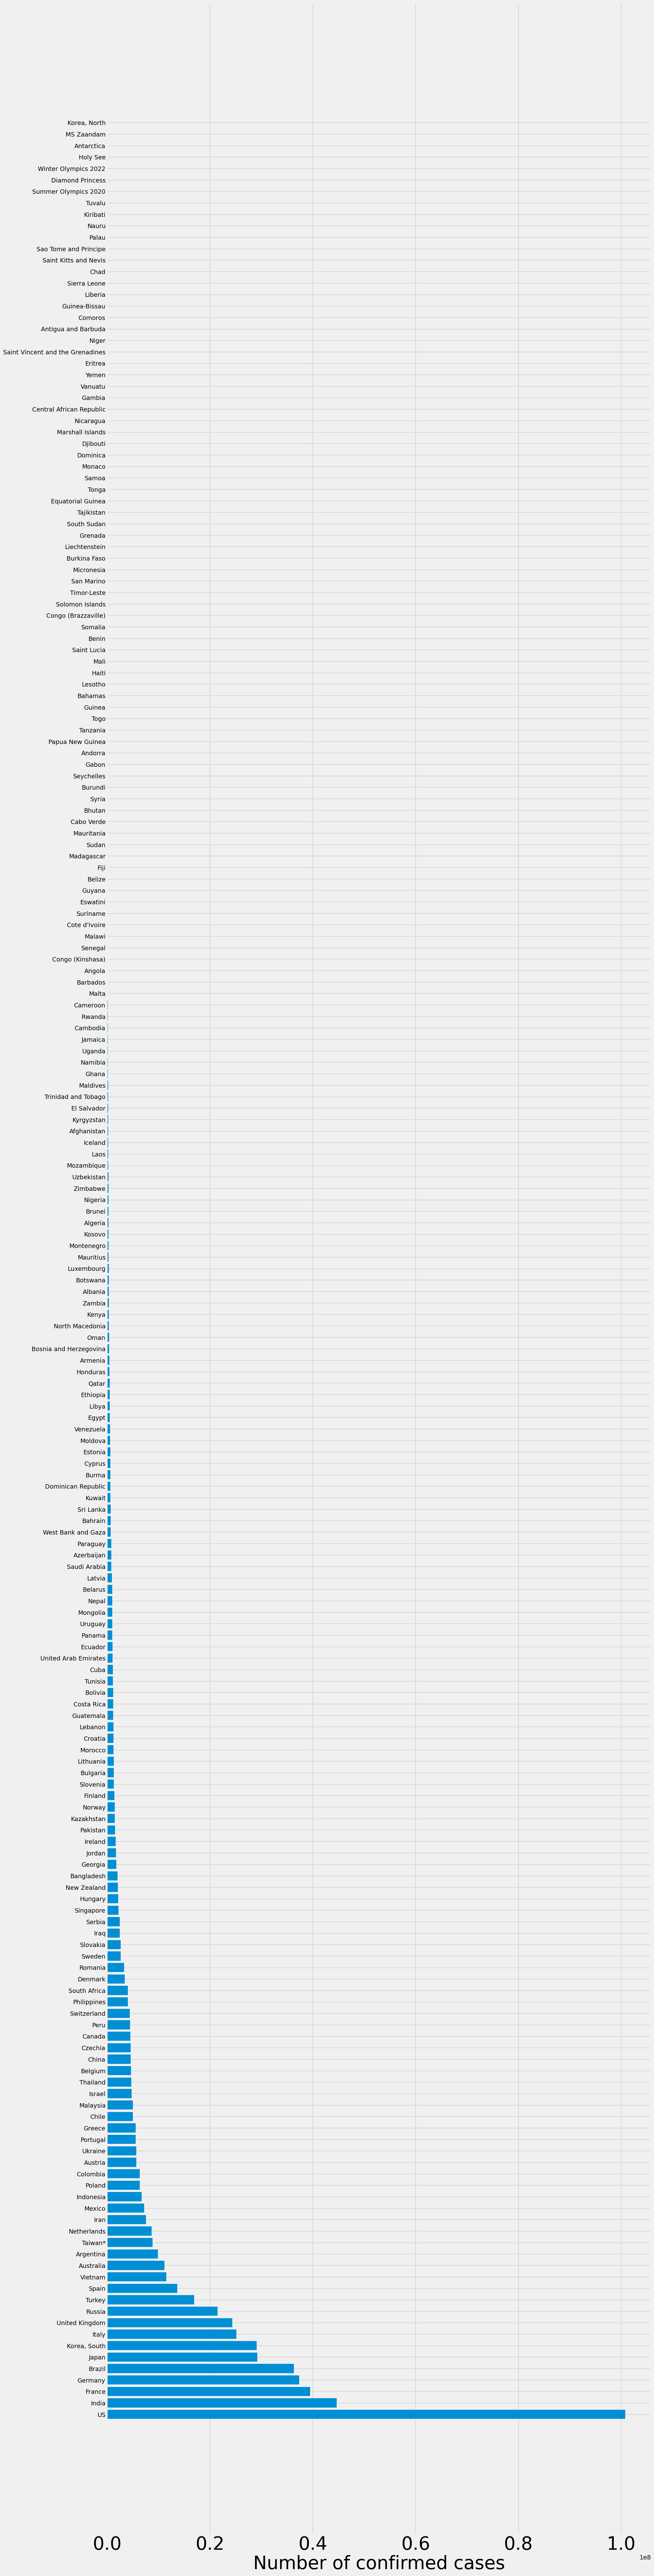

In [88]:
plt.figure(figsize=(20,100))
plt.barh(all_countries, country_confirmed_cases)
plt.xlabel('Number of confirmed cases', size=42)
plt.xticks(size=42)
plt.show()

### Data Table

In [35]:
#Stats for each country in a descending order

country_data = pd.DataFrame({'Country': all_countries,
                         'Confirmed Cases': country_confirmed_cases,
                         'Deaths': country_death_cases,
                         'Mortality Rate': country_mortality_rate})

#Data for individual country
country_data.style.background_gradient(cmap='Reds')

# Data Visualiation

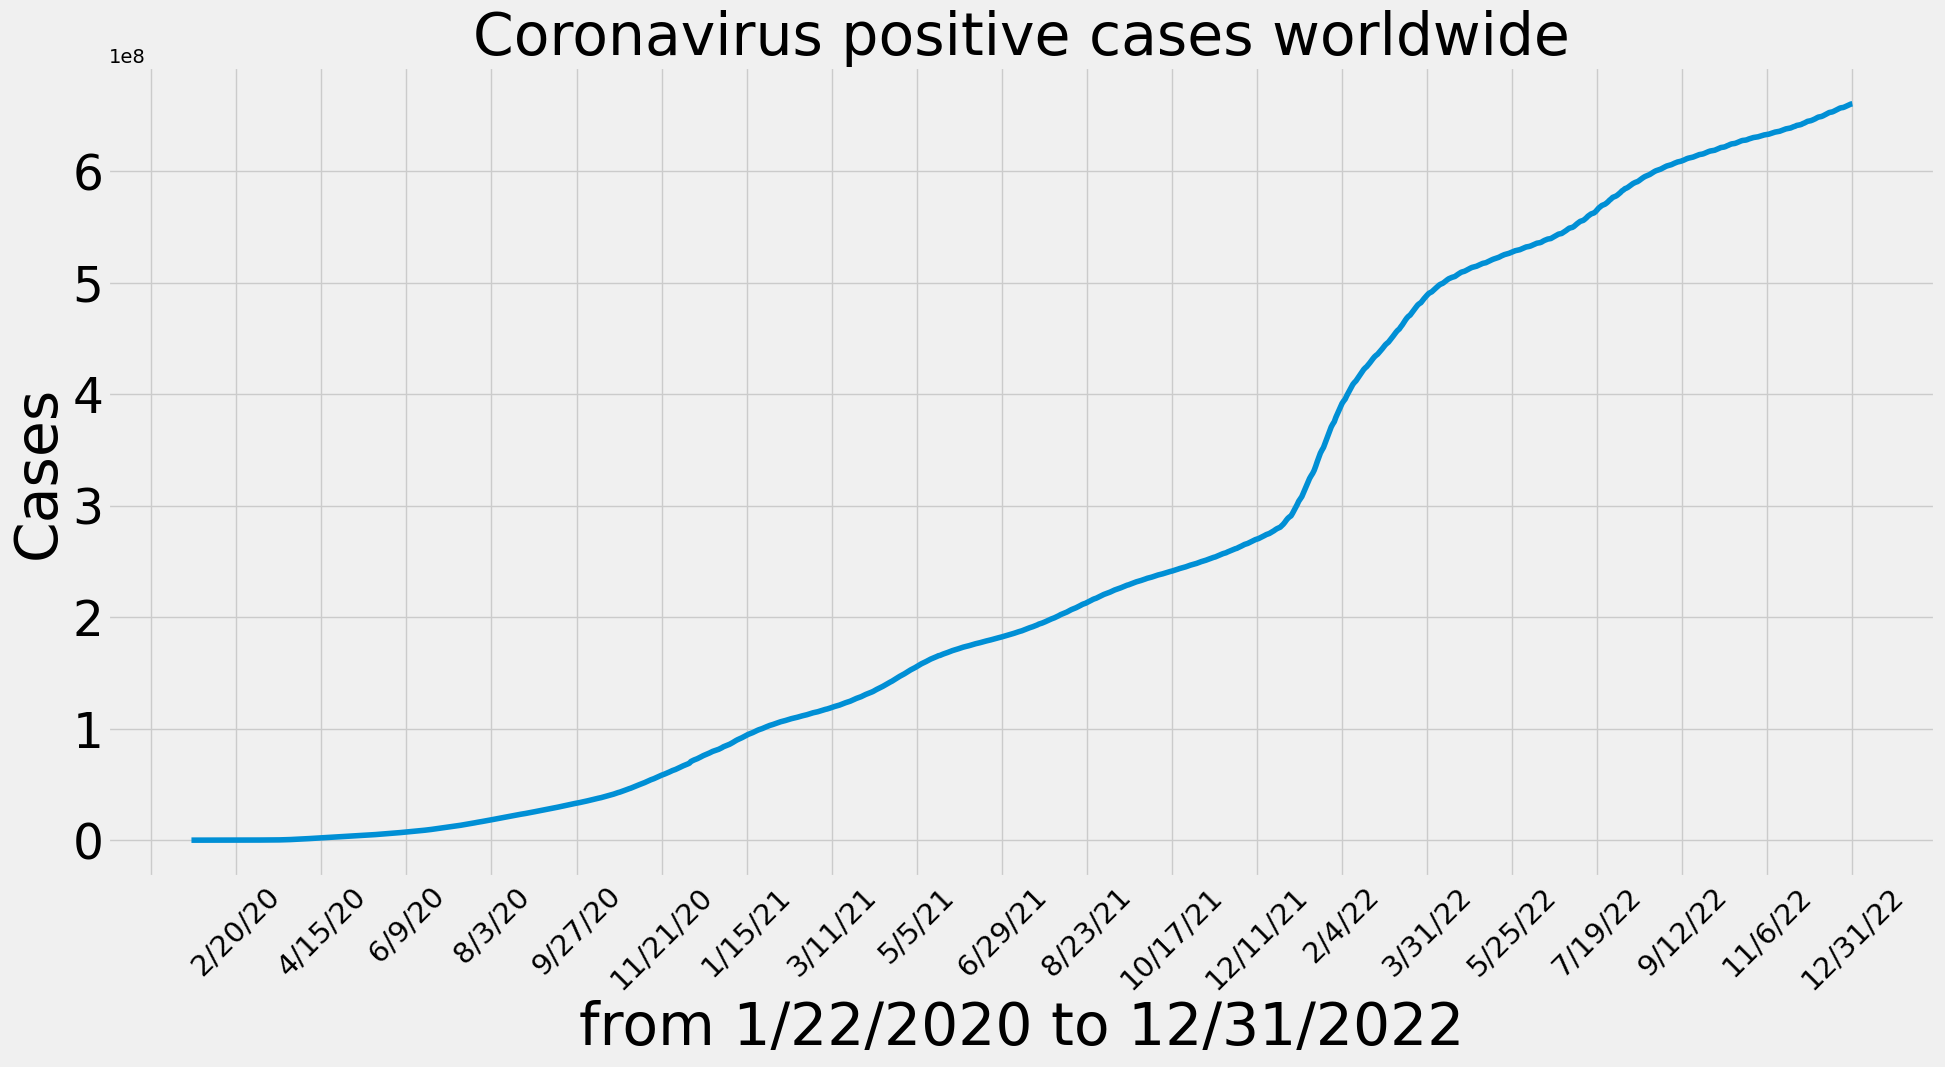

In [37]:
#Plotting the graph for the increasing number of covid cases worldwide overtime
plt.figure(figsize=(21,10))
plt.ylabel('Cases', size=42)
plt.yticks(size=35)
plt.xlabel('from 1/22/2020 to 12/31/2022', size=42)
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=55))
plt.xticks(size=21, rotation=45)
plt.title('Coronavirus positive cases worldwide', size=42)
plt.plot(dates, world_cases)
plt.show()

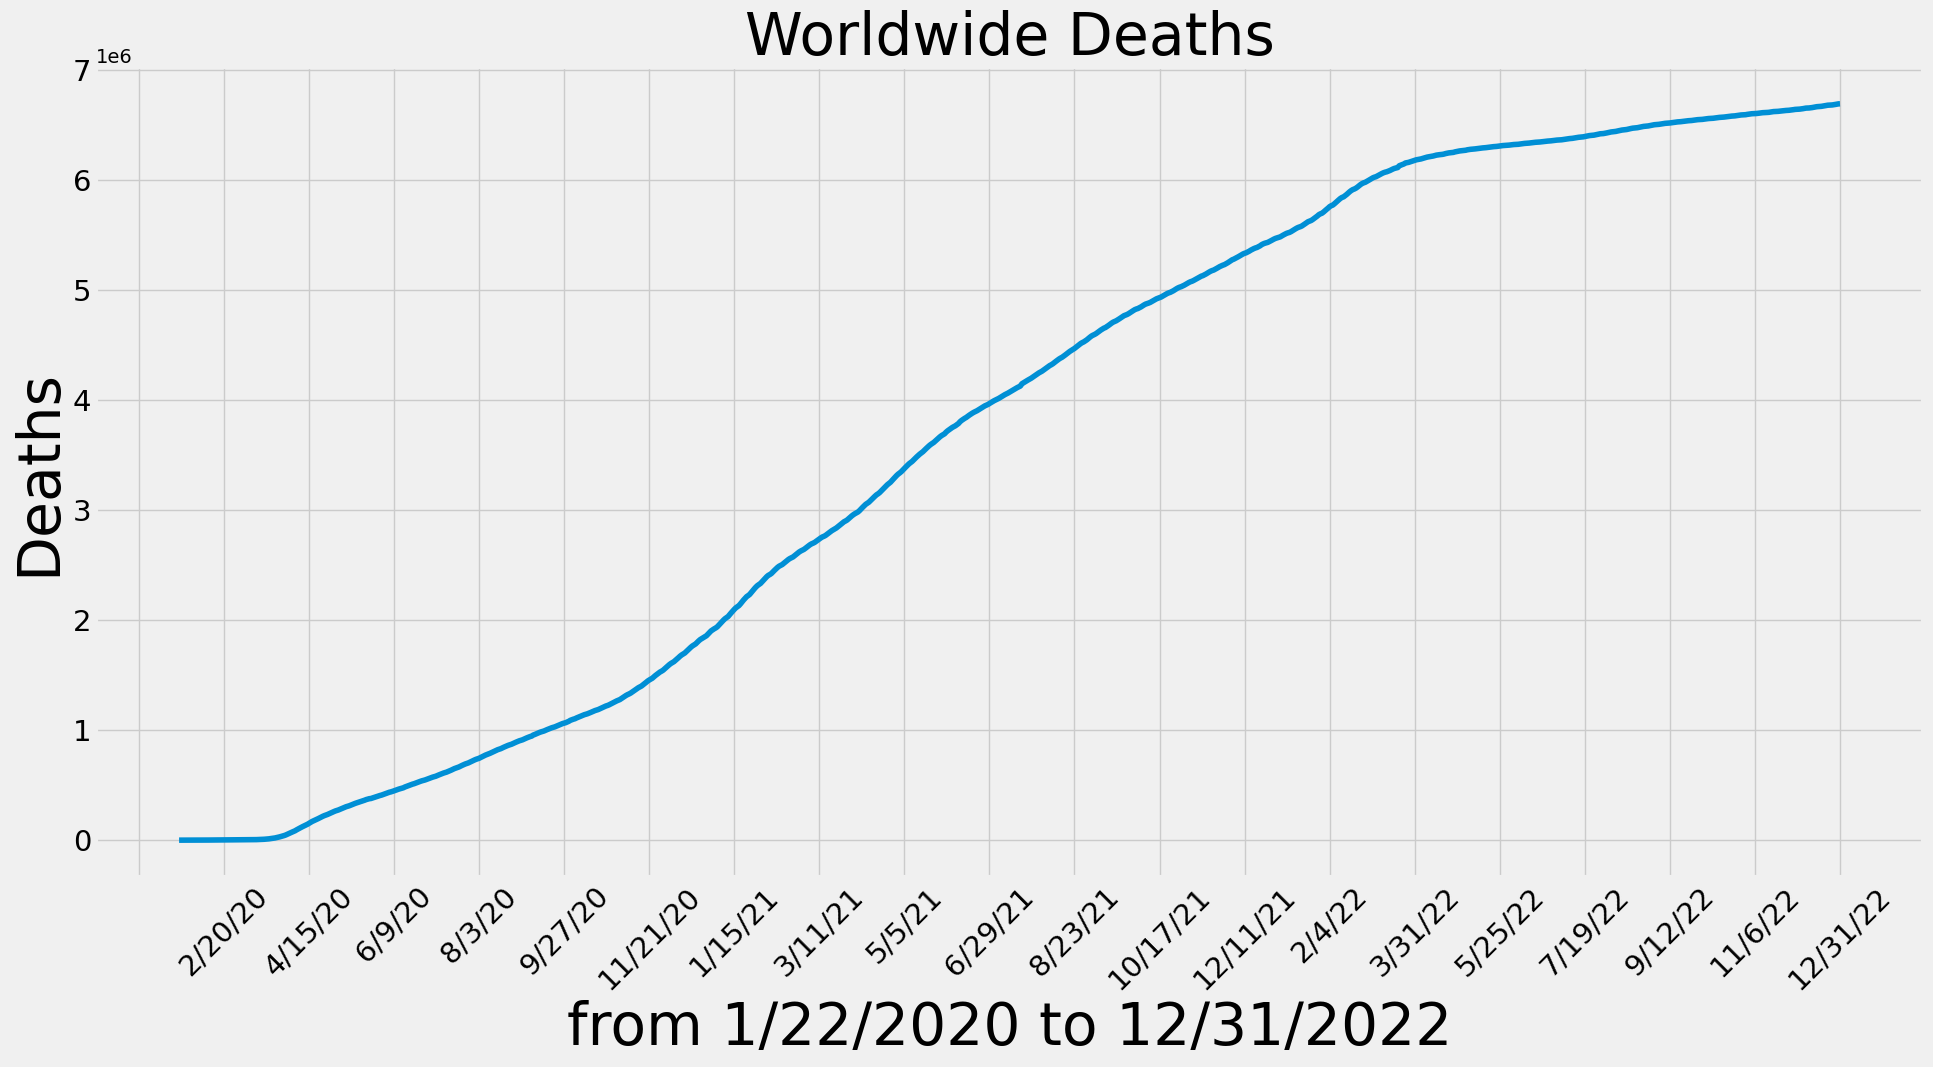

In [89]:
#graph for number of deaths so far
plt.figure(figsize=(21,10))
plt.ylabel('Deaths', size=42)
plt.yticks(size=21)
plt.xlabel('from 1/22/2020 to 12/31/2022', size=42)
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=55))
plt.xticks(size=21, rotation=45)
plt.plot(dates, world_deaths)
plt.title('Worldwide Deaths', size=42)
plt.show()

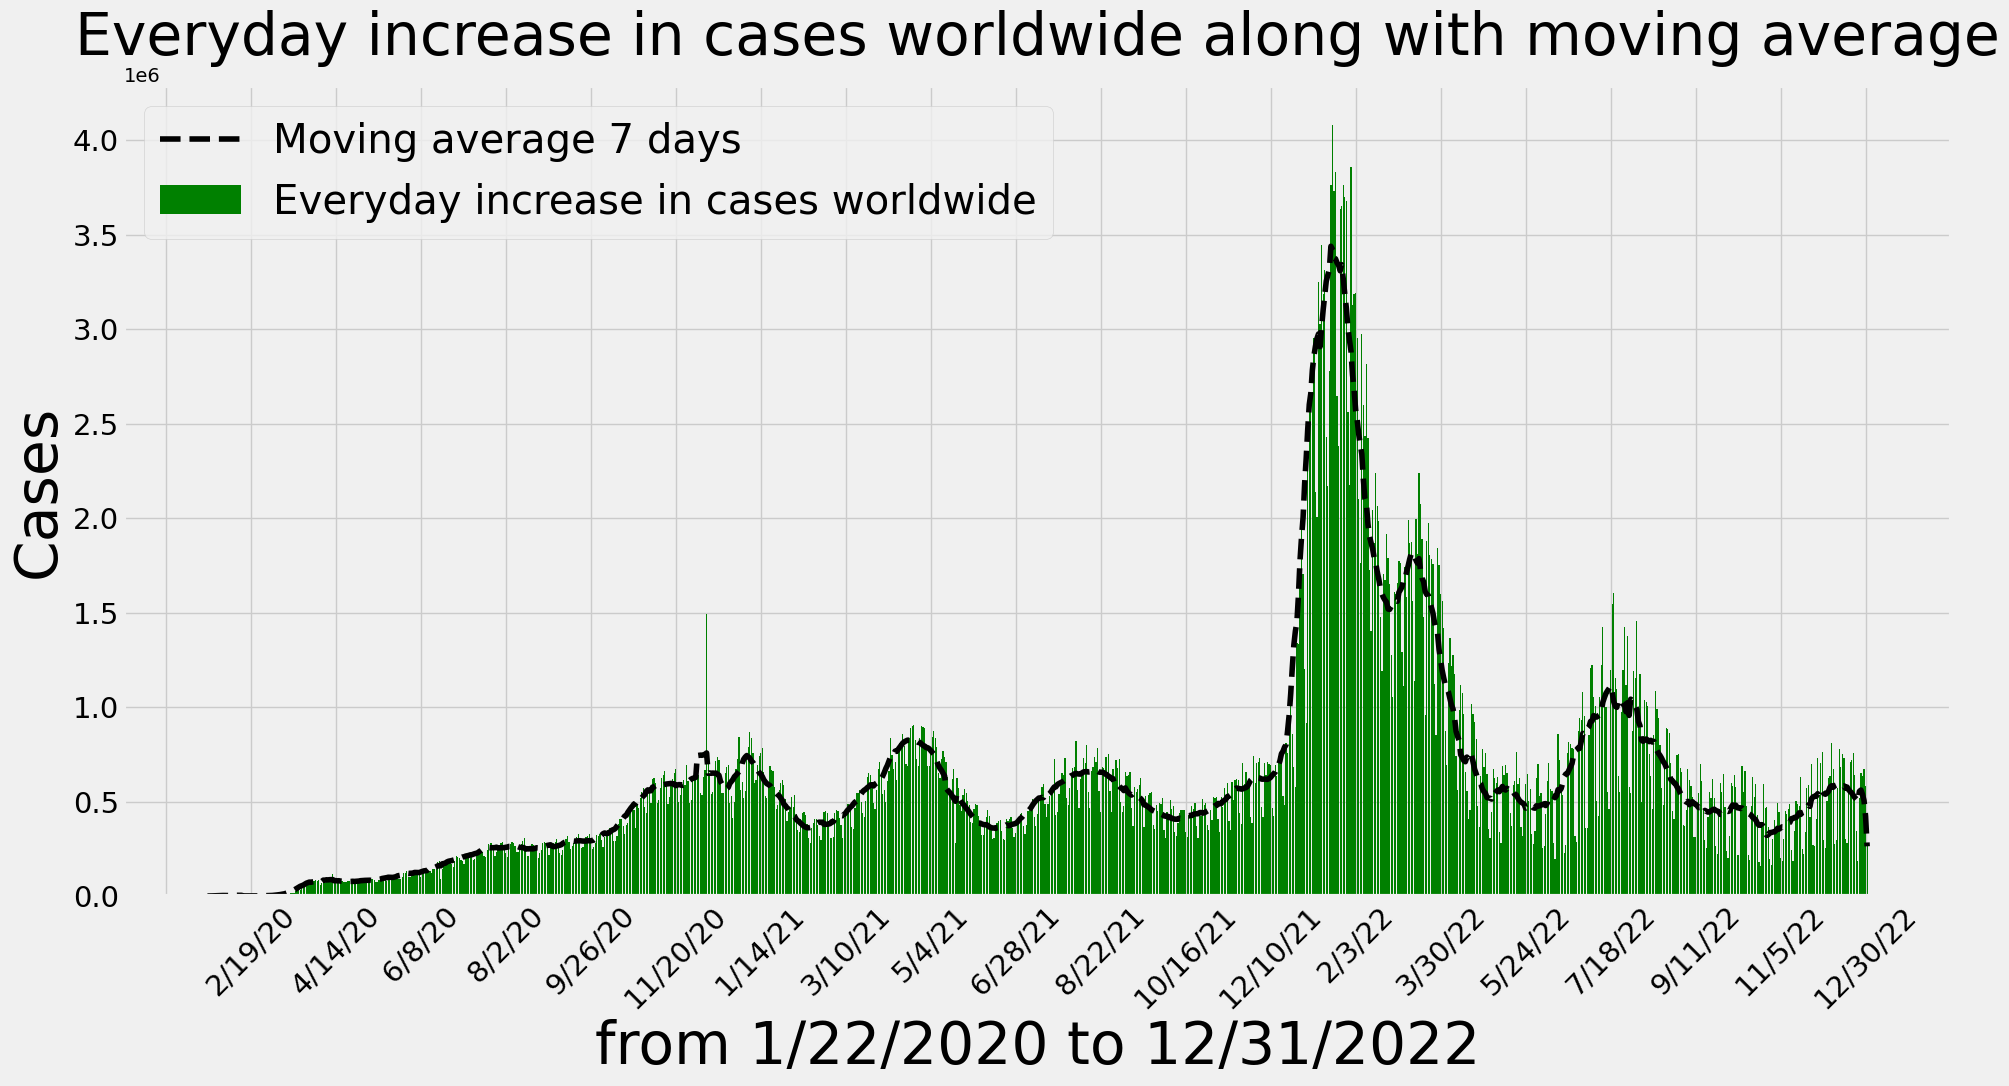

In [41]:
#graph for everyday increase in the number of cases along with their moving average
plt.figure(figsize=(21,10))
plt.plot(dates_modified, world_everyday_cases_avg, color='black', linestyle='dashed')
plt.ylabel('Cases', size=42)
plt.yticks(size=21)
plt.xlabel('from 1/22/2020 to 12/31/2022', size=42)
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=55))
plt.xticks(size=21, rotation=45)
plt.title('Everyday increase in cases worldwide along with moving average', size=42)
plt.bar(dates, world_everyday_cases, color='green')
plt.legend(['Moving average 7 days','Everyday increase in cases worldwide'], prop={'size':29})
plt.show()

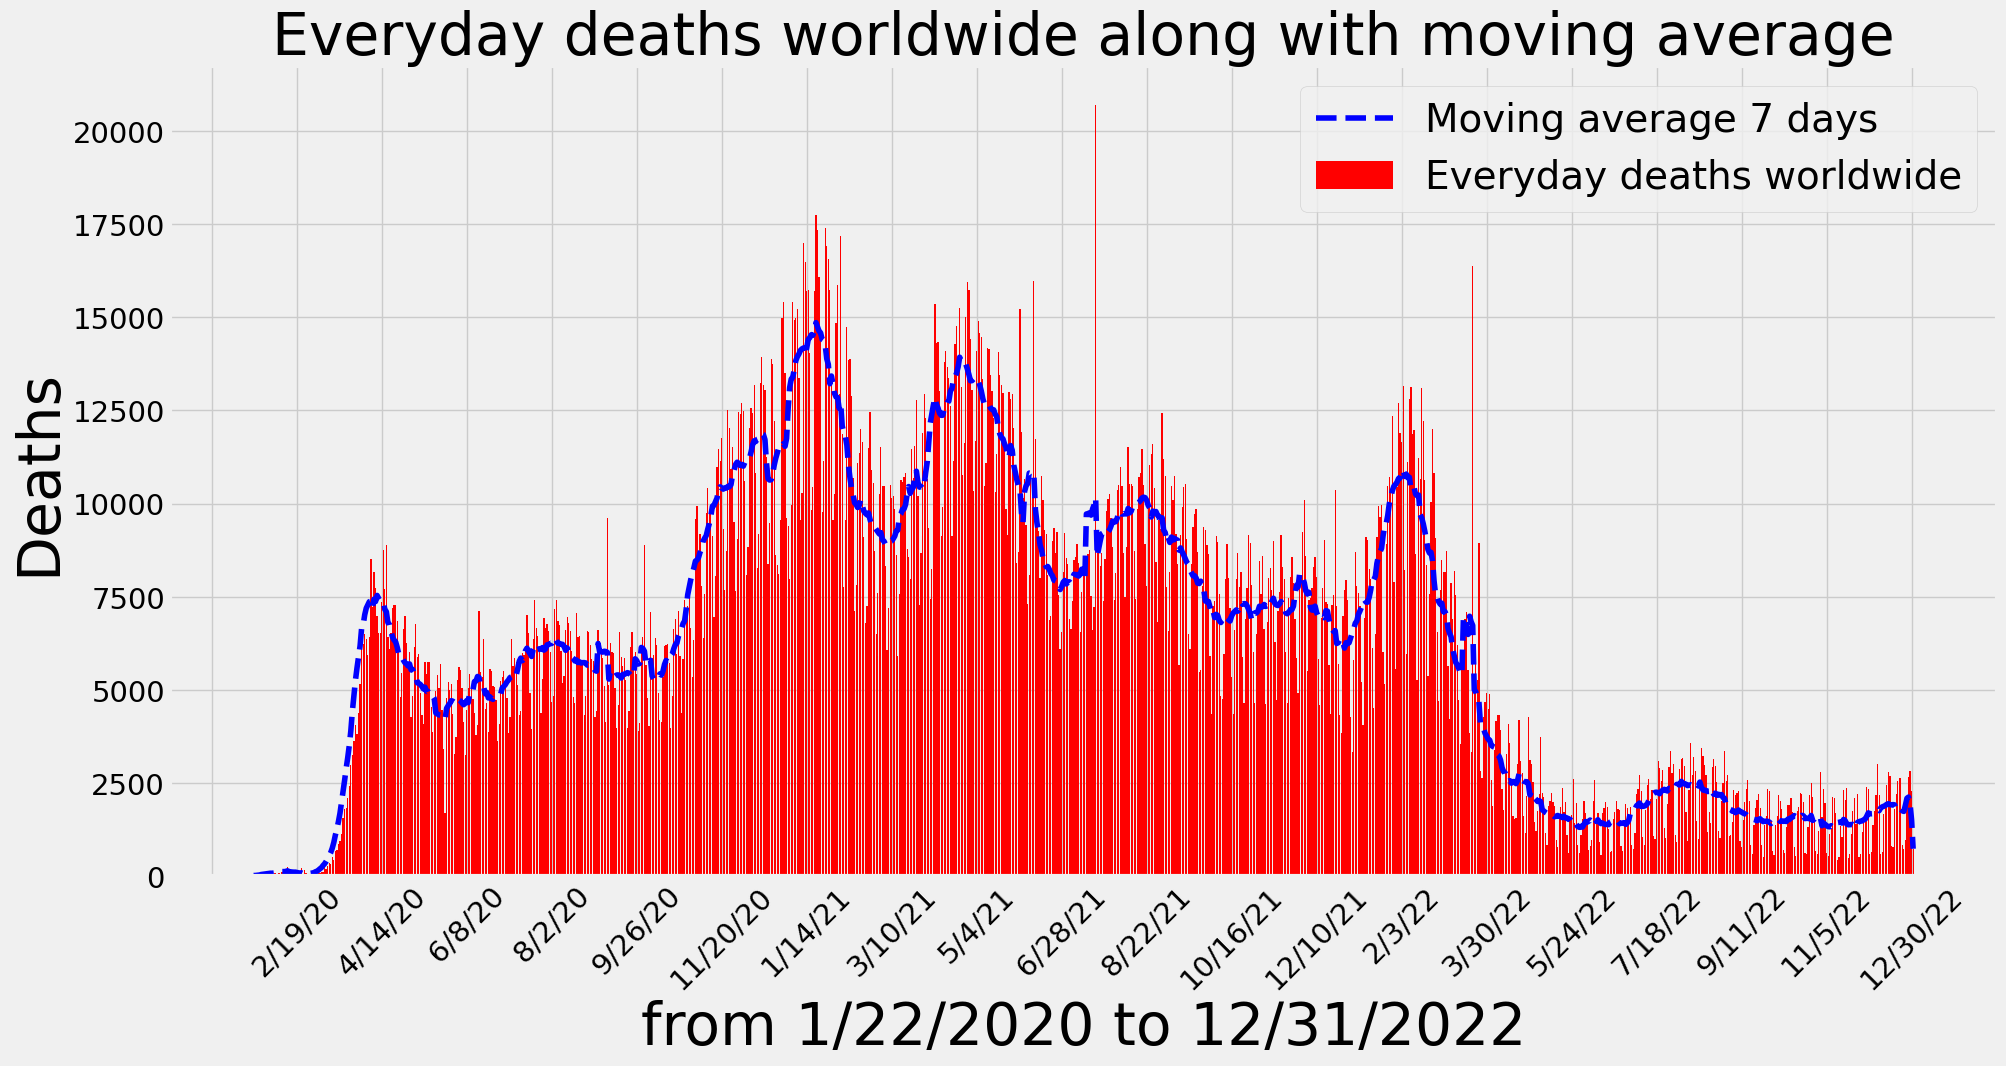

In [42]:
#graph for everyday deaths worldwide along with their moving average
plt.figure(figsize=(21,10))
plt.plot(dates_modified, world_everyday_deaths_avg, color='blue', linestyle='dashed')
plt.ylabel('Deaths', size=42)
plt.yticks(size=21)
plt.xlabel('from 1/22/2020 to 12/31/2022', size=42)
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=55))
plt.xticks(size=21, rotation=45)
plt.title('Everyday deaths worldwide along with moving average', size=42)
plt.bar(dates, world_everyday_deaths, color='red')
plt.legend(['Moving average 7 days','Everyday deaths worldwide'], prop={'size':28})
plt.show()

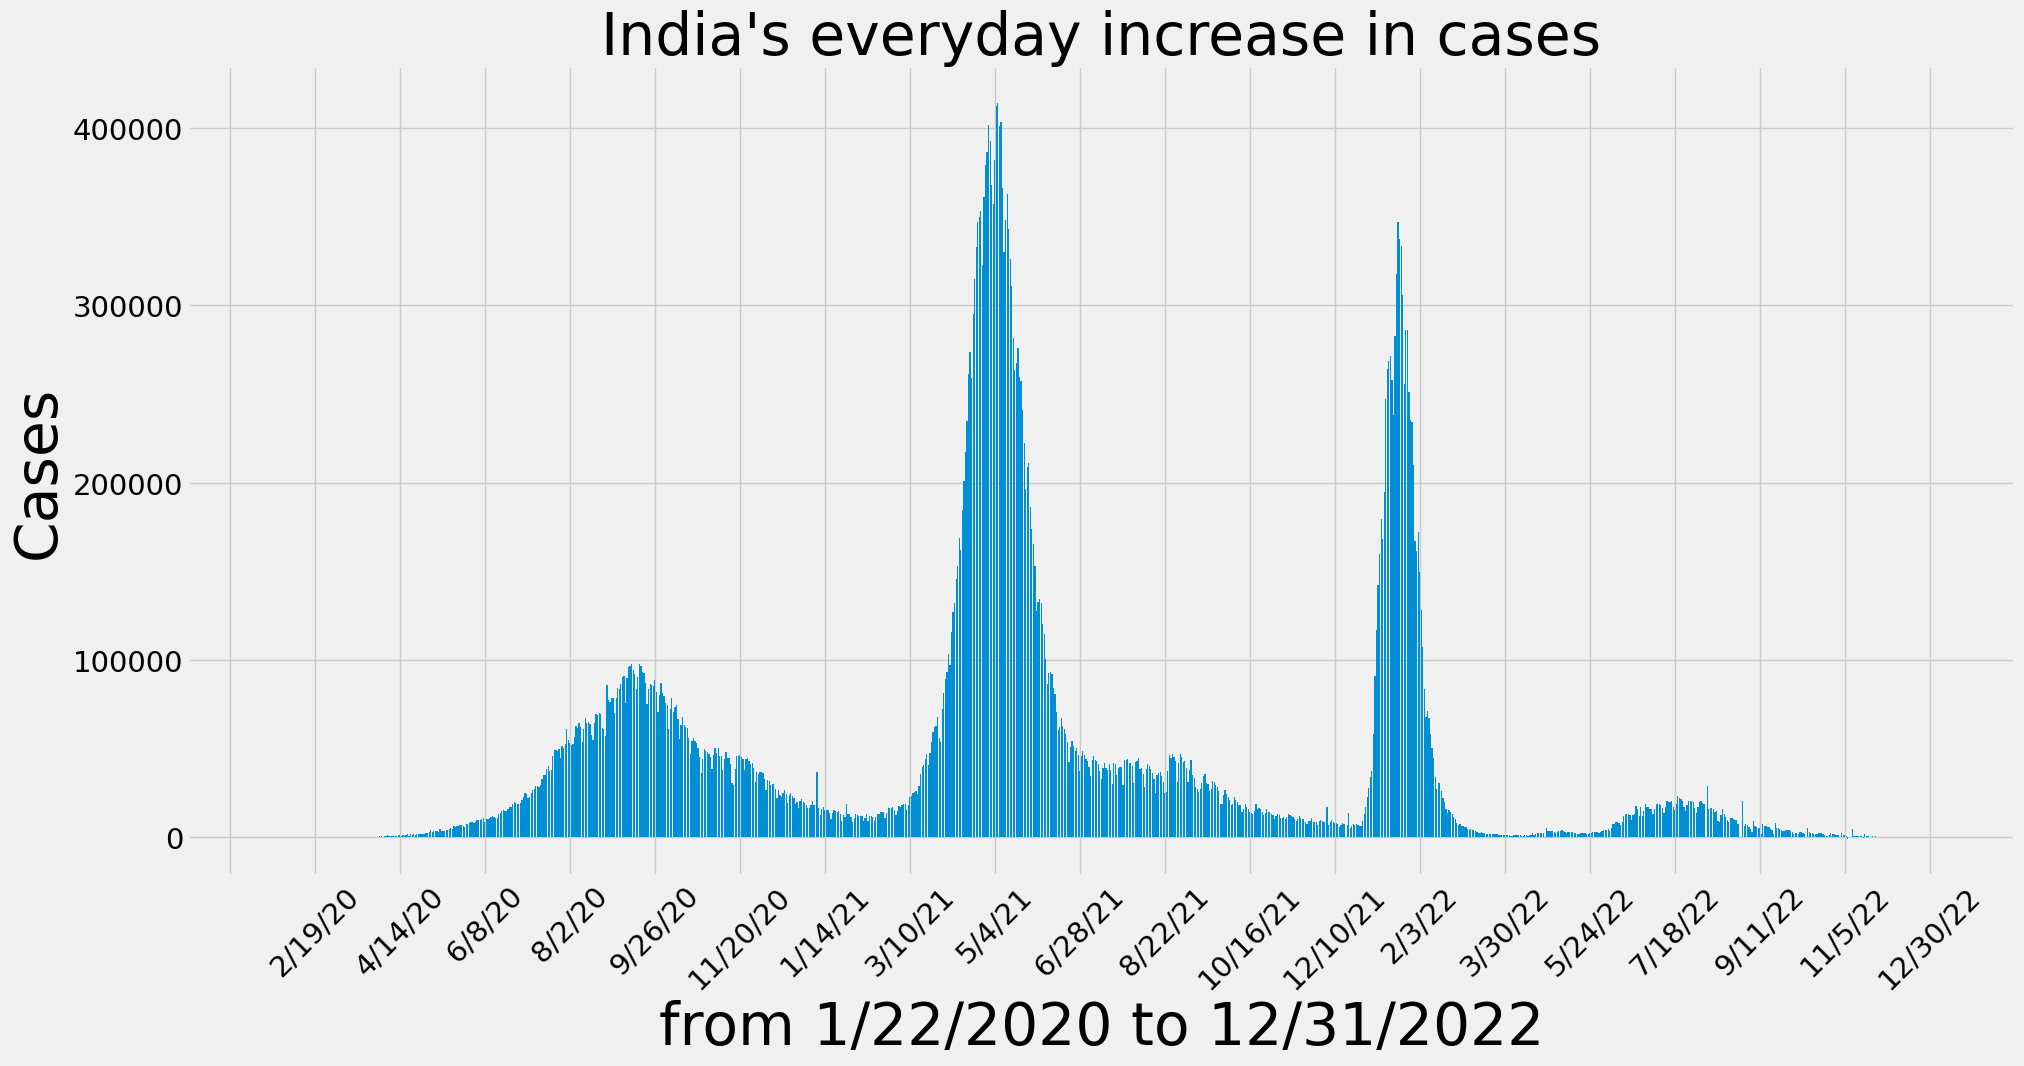

In [100]:
#graph for everyday increase in the number of cases for India
plt.figure(figsize=(21,10))
plt.ylabel('Cases', size=42)
plt.yticks(size=21)
plt.xlabel('from 1/22/2020 to 12/31/2022', size=42)
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=55))
plt.xticks(size=21, rotation=45)
plt.title("India's everyday increase in cases", size=42)
plt.bar(dates, india_everyday_cases)
plt.show()

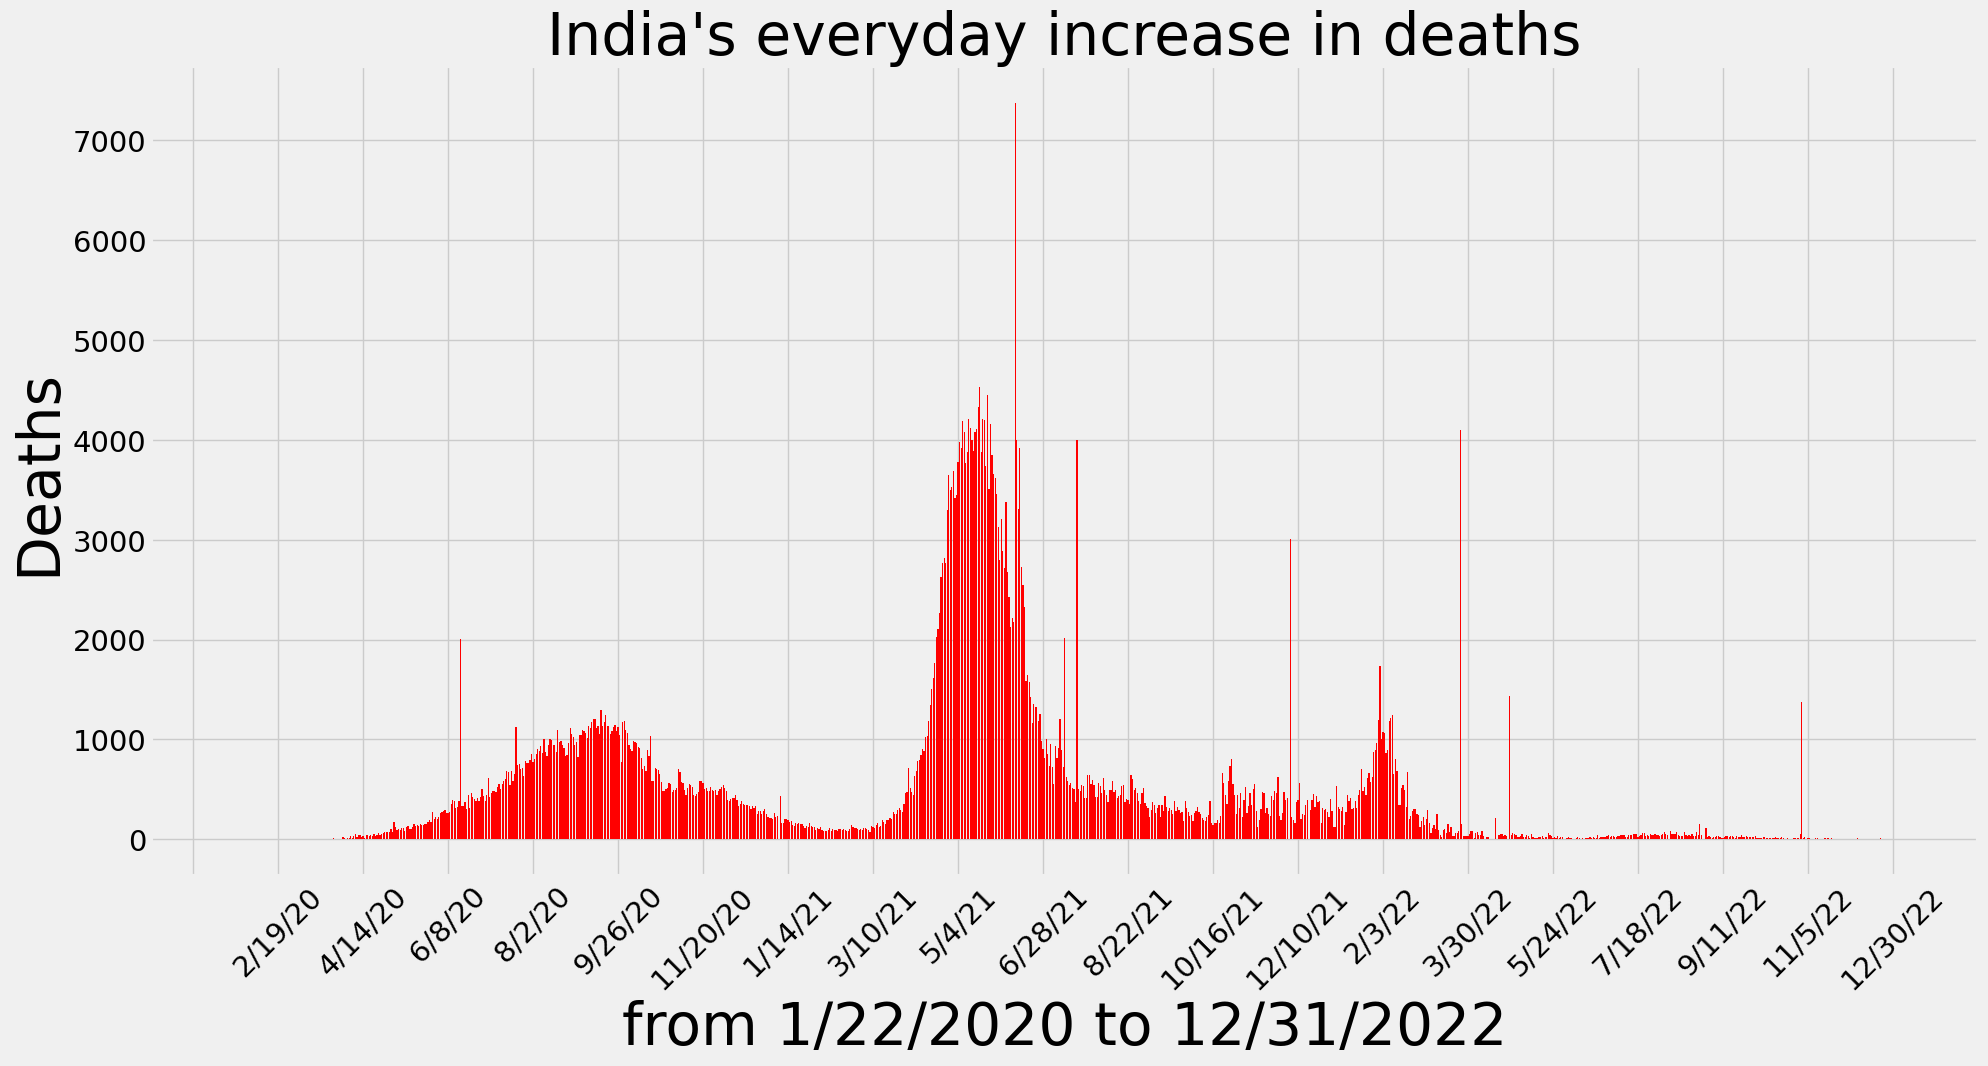

In [92]:
#graph for everyday increase in the number of deaths for India
plt.figure(figsize=(21,10))
plt.ylabel('Deaths', size=42)
plt.yticks(size=21)
plt.xlabel('from 1/22/2020 to 12/31/2022', size=42)
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=55))
plt.xticks(size=21, rotation=45)
plt.title("India's everyday increase in deaths", size=42)
plt.bar(dates, india_everyday_deaths, color='Red')
plt.show()

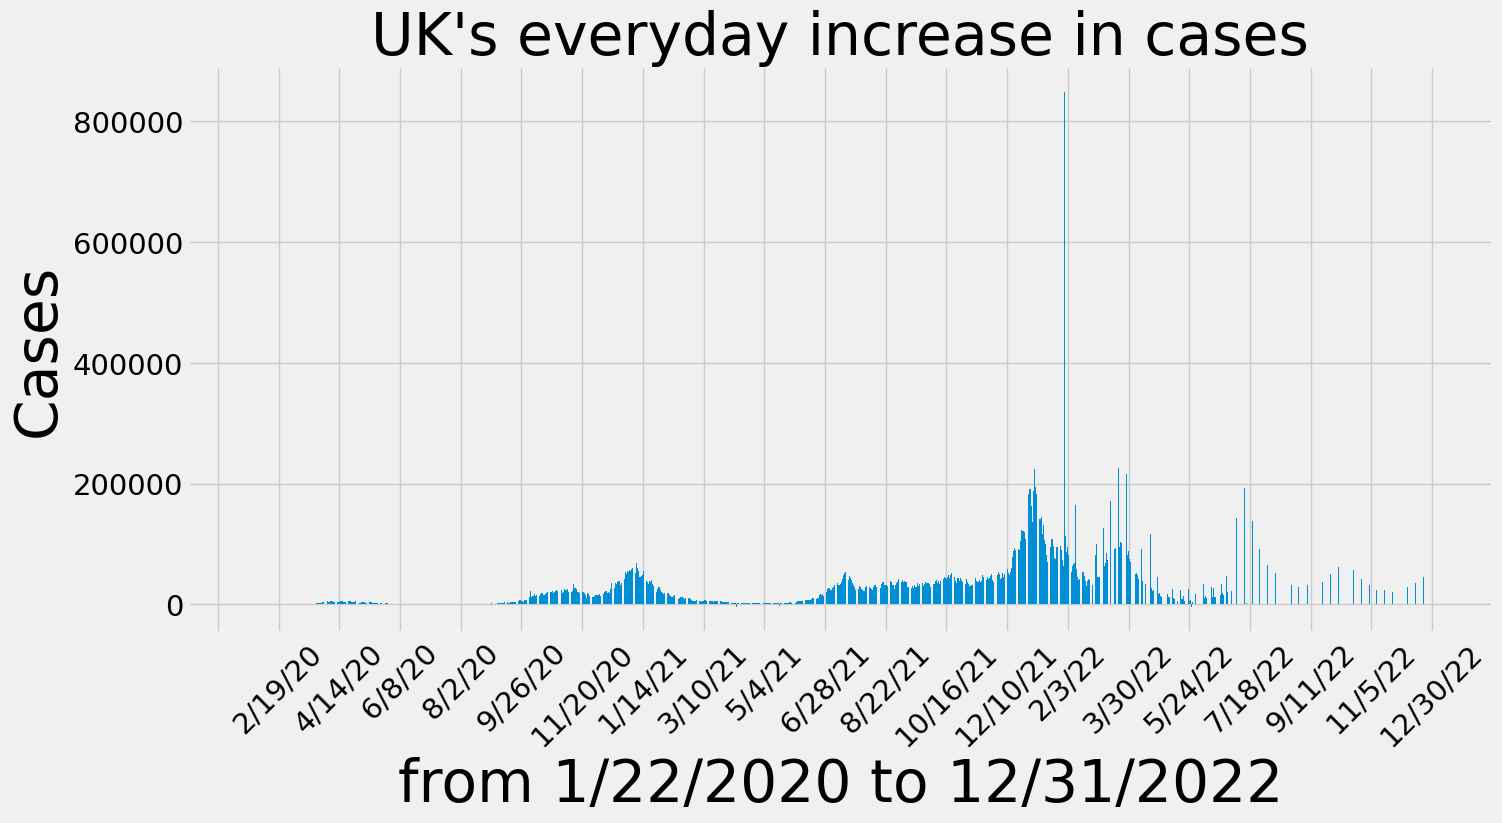

In [44]:
#graph for everyday increase in the number of cases for the UK
plt.figure(figsize=(15,7))
plt.ylabel('Cases', size=42)
plt.yticks(size=21)
plt.xlabel('from 1/22/2020 to 12/31/2022', size=42)
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=55))
plt.xticks(size=21, rotation=45)
plt.title("UK's everyday increase in cases", size=42)
plt.bar(dates, uk_everyday_cases)
plt.show()

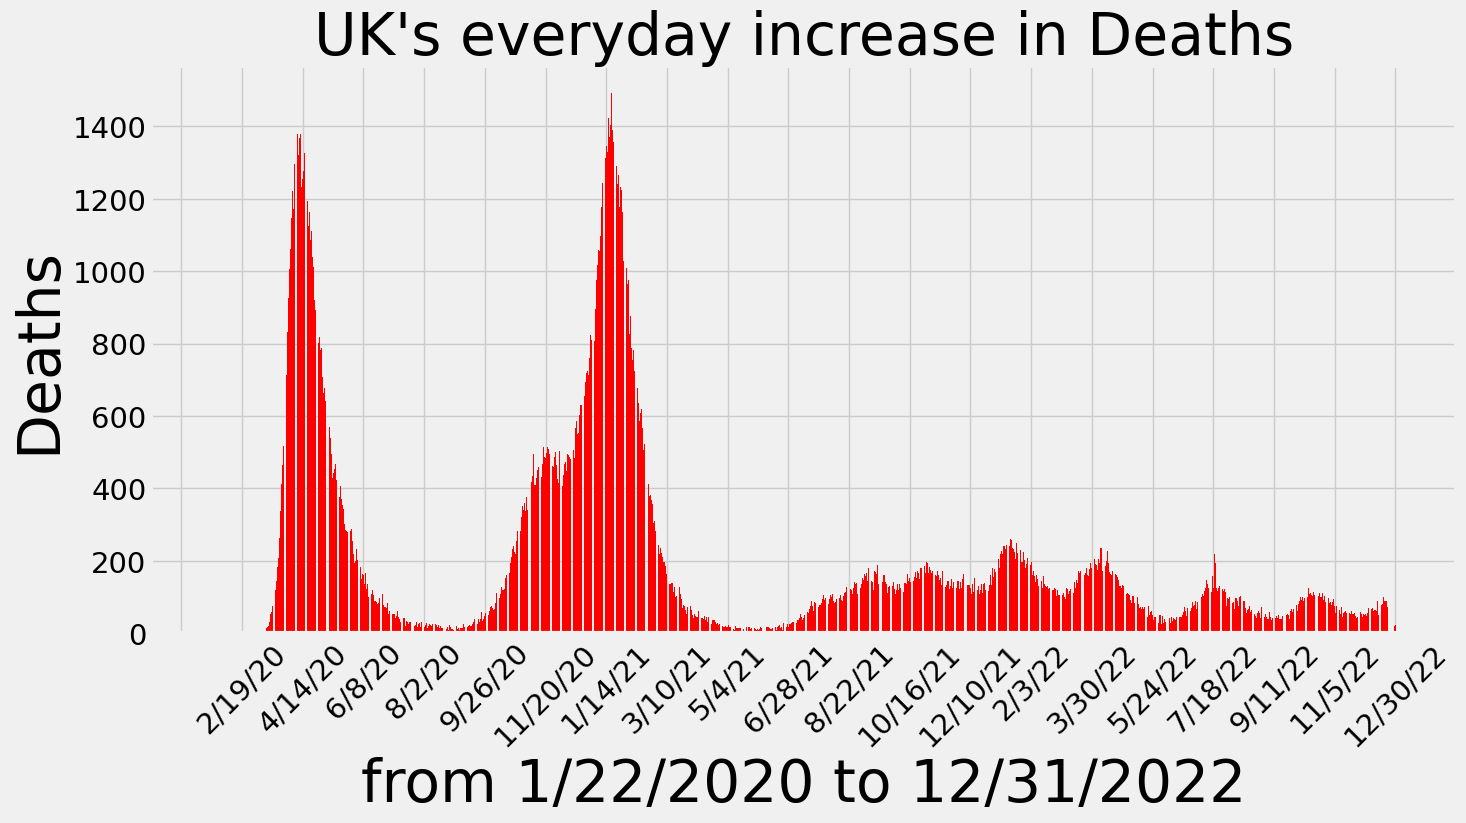

In [94]:
#graph for everyday increase in the number of deaths for the UK
plt.figure(figsize=(15,7))
plt.ylabel('Deaths', size=42)
plt.yticks(size=21)
plt.xlabel('from 1/22/2020 to 12/31/2022', size=42)
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=55))
plt.xticks(size=21, rotation=45)
plt.title("UK's everyday increase in Deaths", size=42)
plt.bar(dates, uk_everyday_deaths, color='Red')
plt.show()

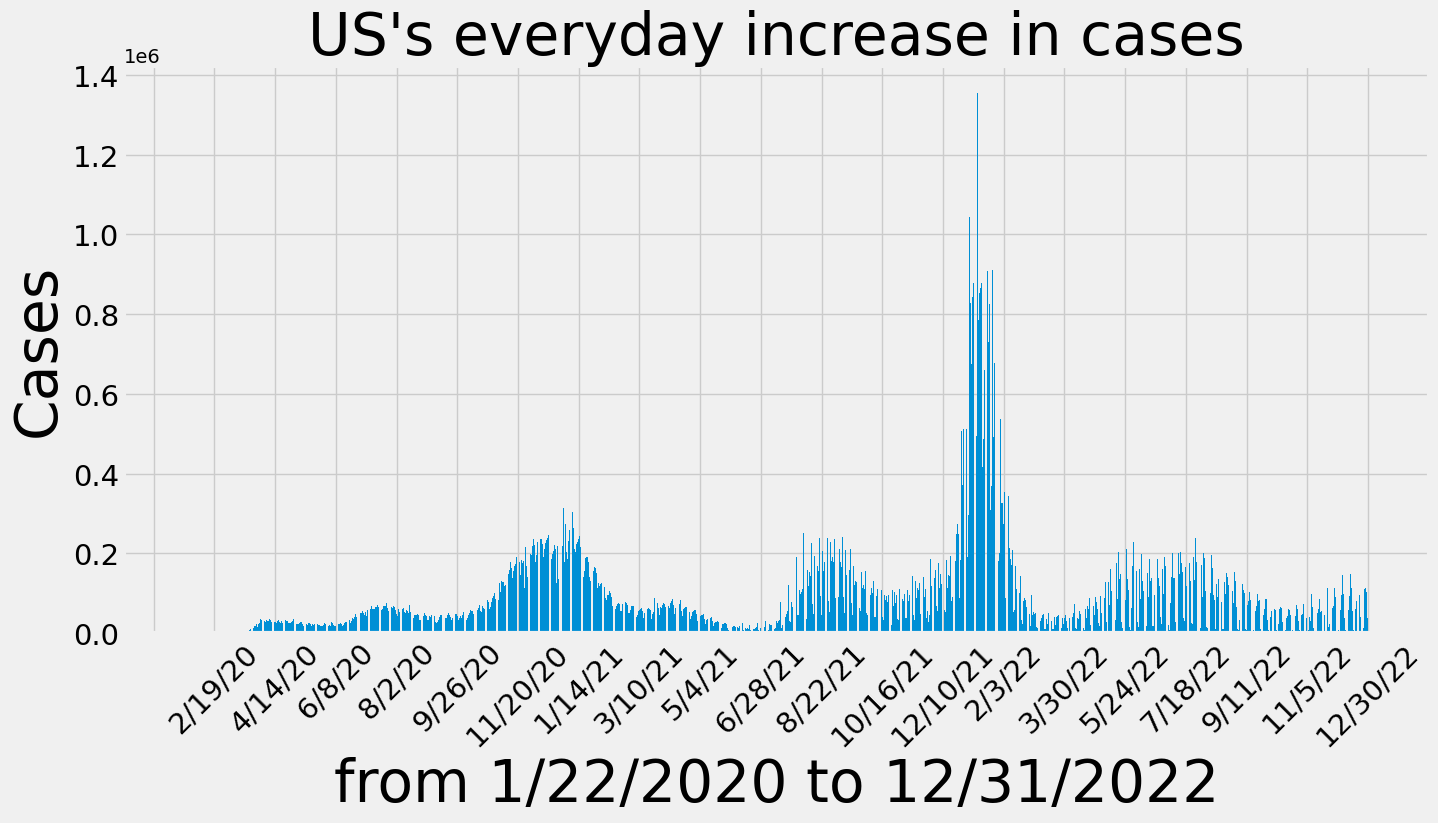

In [98]:
#graph for everyday increase in the number of cases for US
plt.figure(figsize=(15,7))
plt.ylabel('Cases', size=42)
plt.yticks(size=21)
plt.xlabel('from 1/22/2020 to 12/31/2022', size=42)
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=55))
plt.xticks(size=21, rotation=45)
plt.title("US's everyday increase in cases", size=42)
plt.bar(dates, us_everyday_cases)
plt.show()

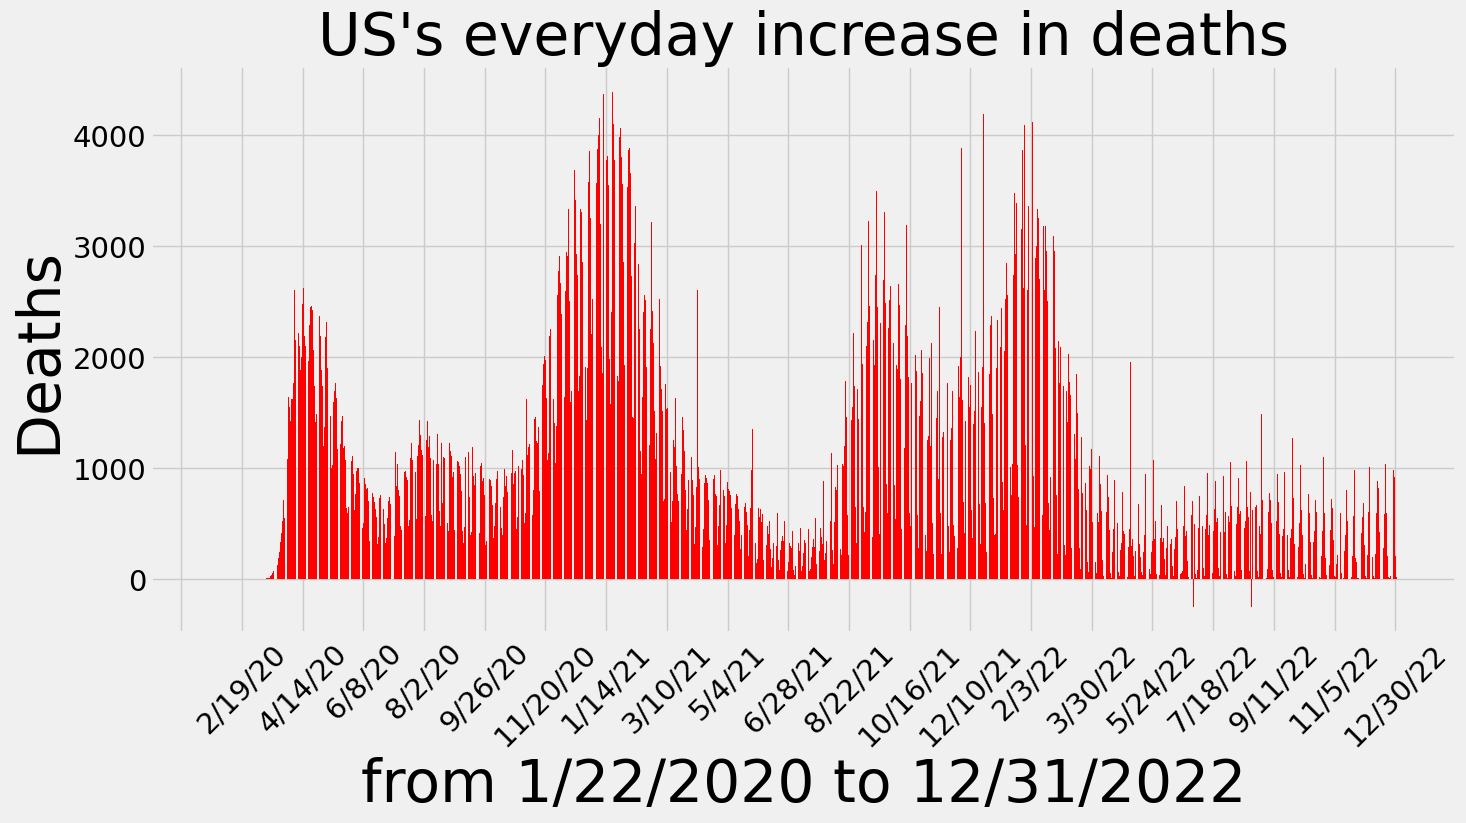

In [101]:
#graph for everyday increase in the number of deaths for US
plt.figure(figsize=(15,7))
plt.ylabel('Deaths', size=42)
plt.yticks(size=21)
plt.xlabel('from 1/22/2020 to 12/31/2022', size=42)
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=55))
plt.xticks(size=21, rotation=45)
plt.title("US's everyday increase in deaths", size=42)
plt.bar(dates, us_everyday_deaths, color='Red')
plt.show()

In [46]:
#top 10 countries with highest number for cases
others = np.sum(country_confirmed_cases[10:])
visual_confirmed_cases = []
visual_unique_countries = []

for x in range(len(country_confirmed_cases[:10])):
    visual_confirmed_cases.append(country_confirmed_cases[x])
    visual_unique_countries.append(all_countries[x])
    
visual_confirmed_cases.append(others)
visual_unique_countries.append('Others')

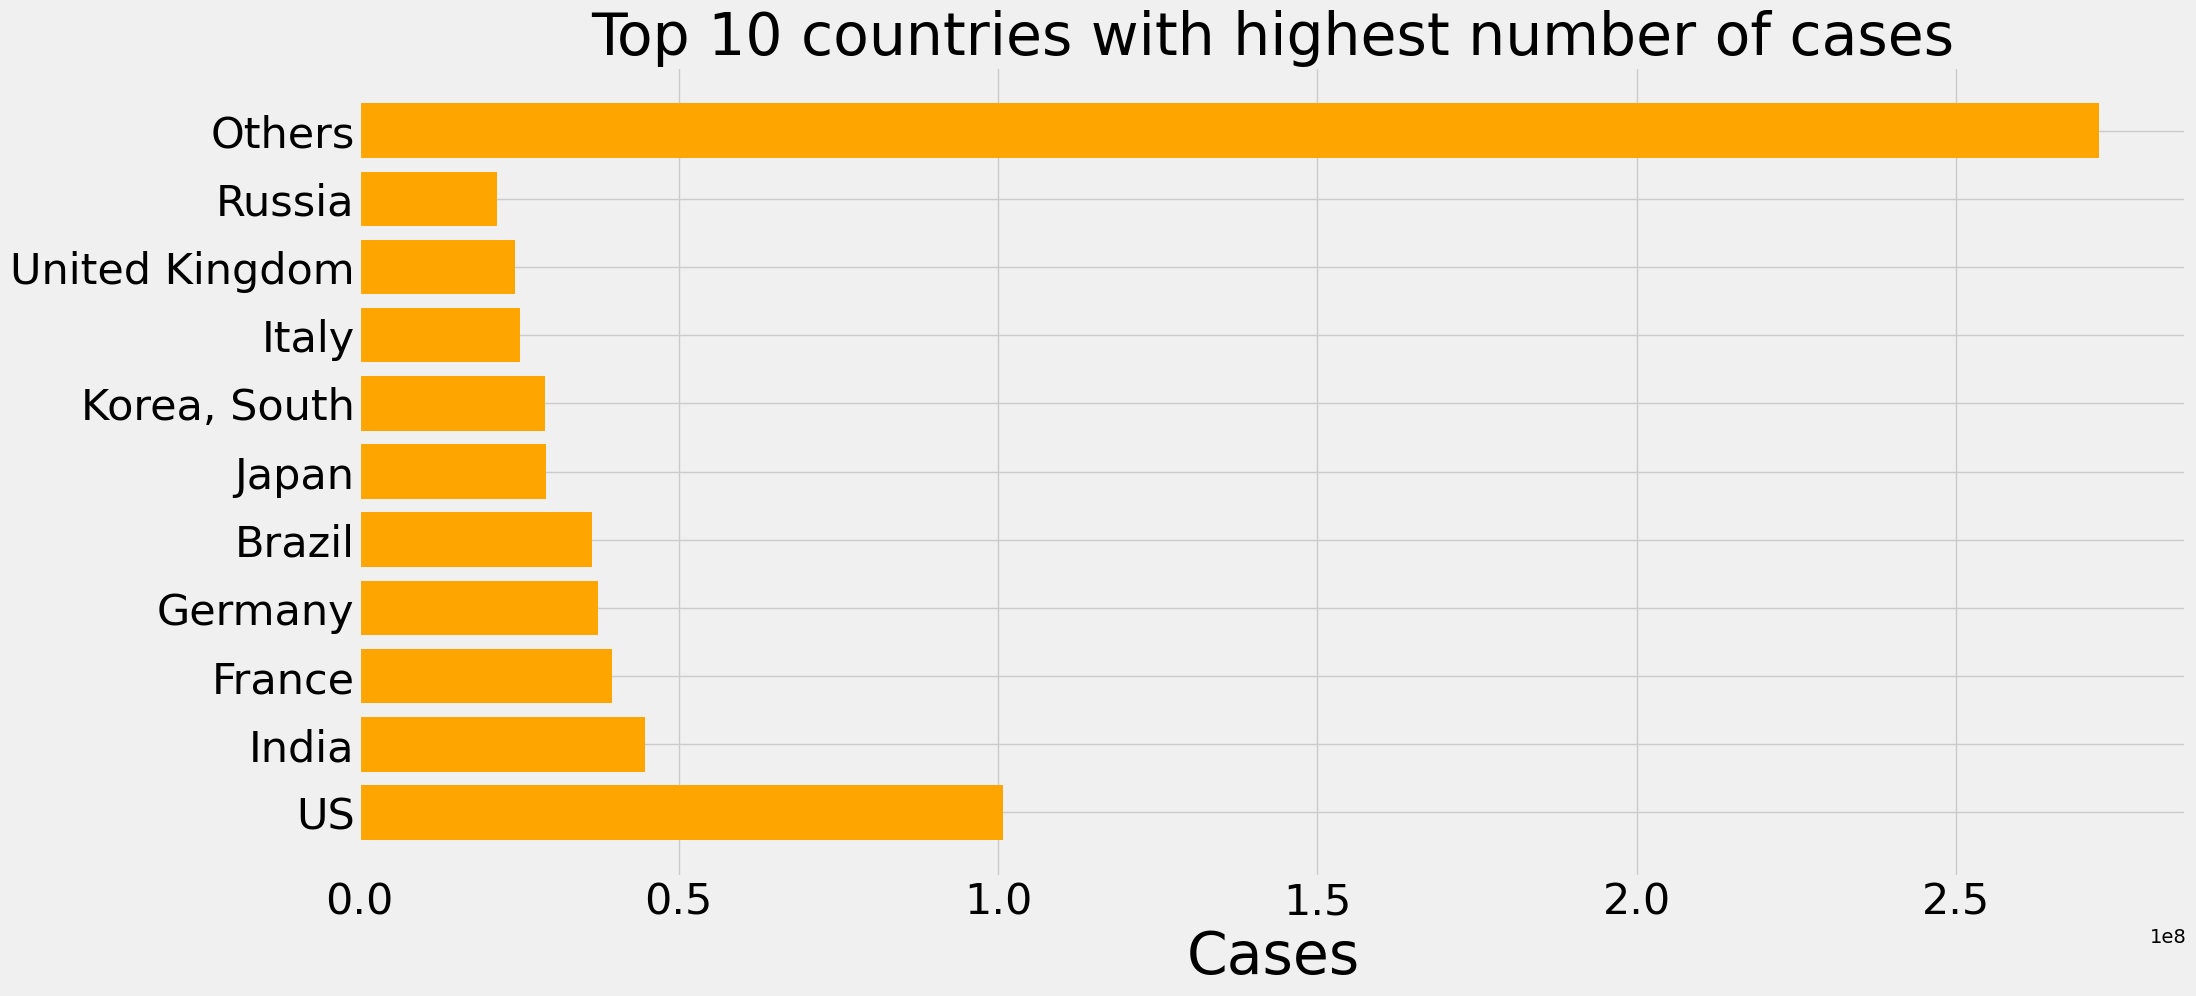

In [47]:
plt.figure(figsize=(21,10))
plt.barh(visual_unique_countries, visual_confirmed_cases, color='orange')
plt.yticks(size=31)
plt.xticks(size=31)
plt.xlabel('Cases', size=42)
plt.title('Top 10 countries with highest number of cases', size=42)
plt.show()

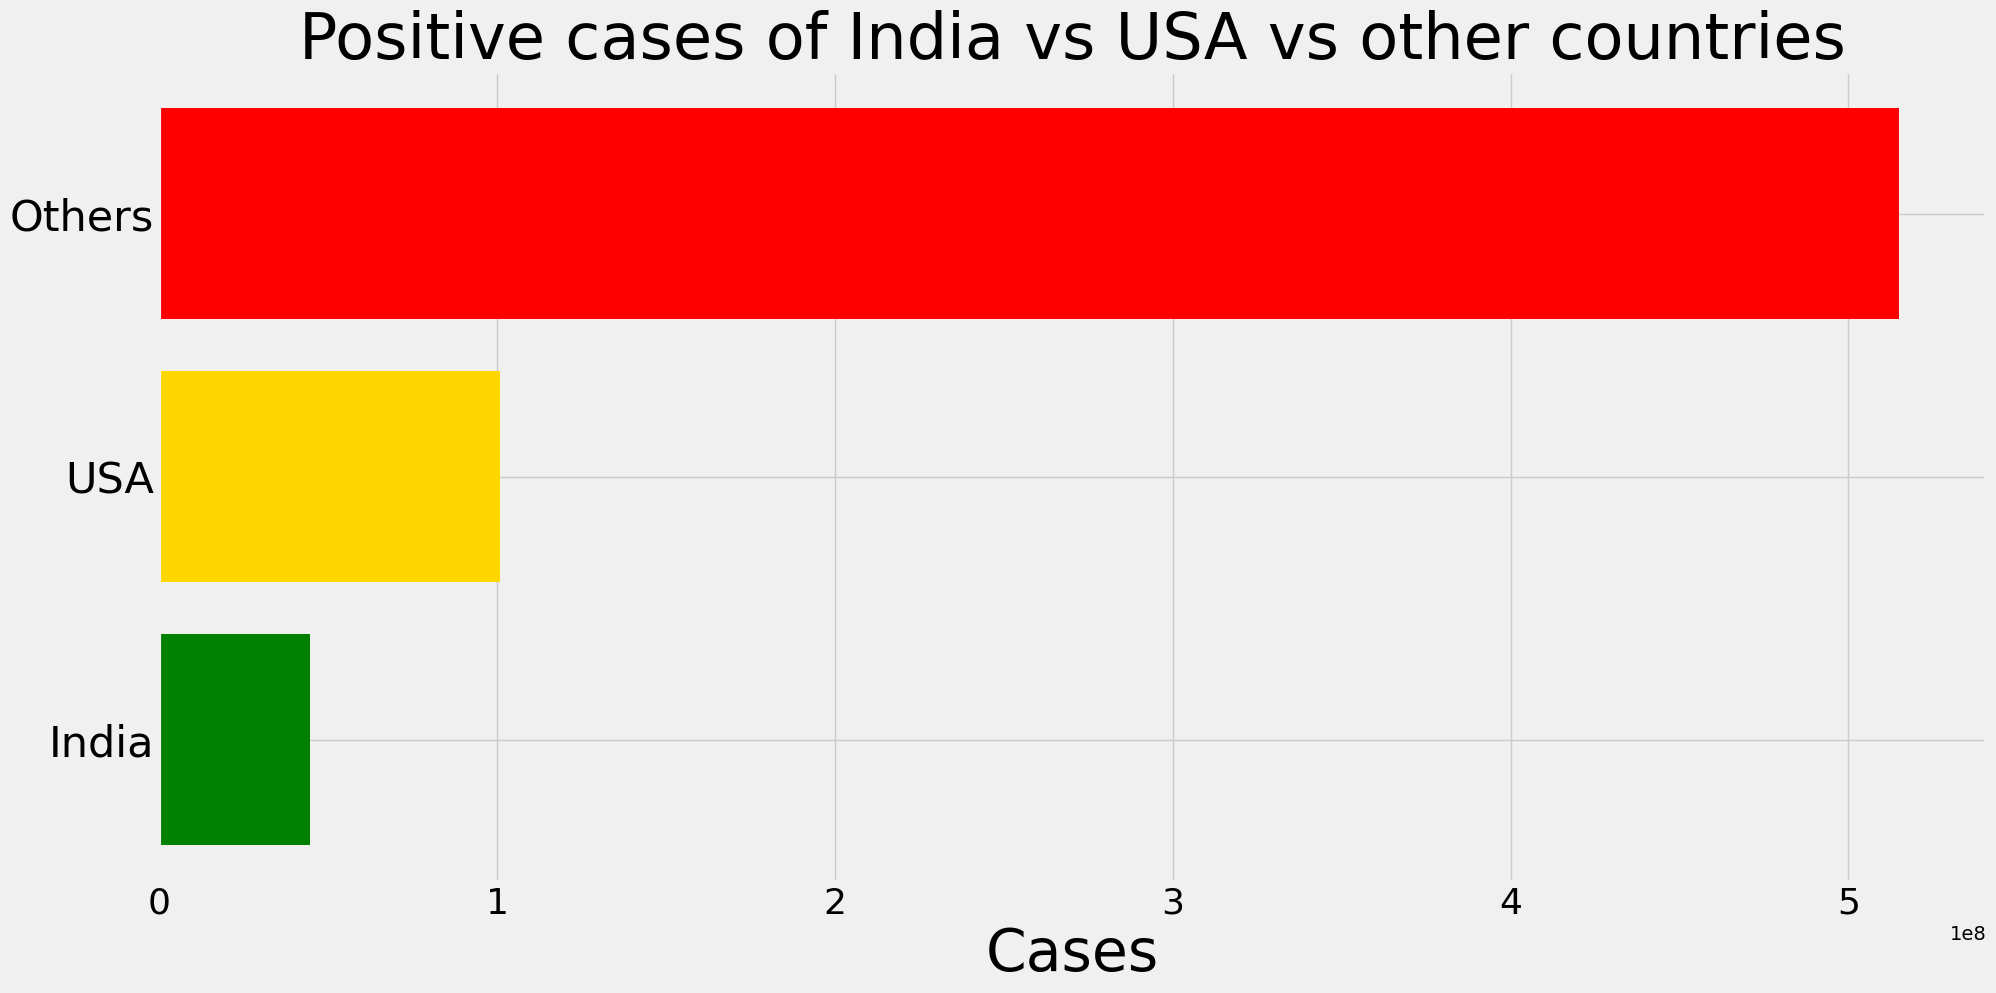

In [48]:
#Comparing positive cases in India vs US vs all the other countries
US_confirmed = latest[latest['Country_Region']=='US']['Confirmed'].sum()
IN_confirmed = latest[latest['Country_Region']=='India']['Confirmed'].sum()
others_confirmed = np.sum(country_confirmed_cases) - US_confirmed - IN_confirmed
plt.figure(figsize=(21,10))
plt.barh('India', IN_confirmed, color='Green')
plt.barh('USA', US_confirmed, color='gold')
plt.barh('Others', others_confirmed, color='red')
plt.yticks(size=31)
plt.xticks(size=26)
plt.xlabel('Cases', size=42)
plt.title('Positive cases of India vs USA vs other countries', size=46)
plt.show()

In [102]:
#percentage split of positive cases in India vs US vs Other countries
print('United States {} cases ({}%)'.format(US_confirmed, np.round((US_confirmed/confirmed_total)*100, 1)))
print('India {} cases ({}%)'.format(IN_confirmed, np.round((IN_confirmed/confirmed_total)*100, 1)))
print('Other countries {} cases ({}%):'.format(others_confirmed, np.round((others_confirmed/confirmed_total)*100, 1)))
print('Total: {} cases'.format(confirmed_total))

United States 100780720 cases (15.3%)
India 44679873 cases (6.8%)
Other countries 515018586 cases (78.0%):
Total: 660479293 cases


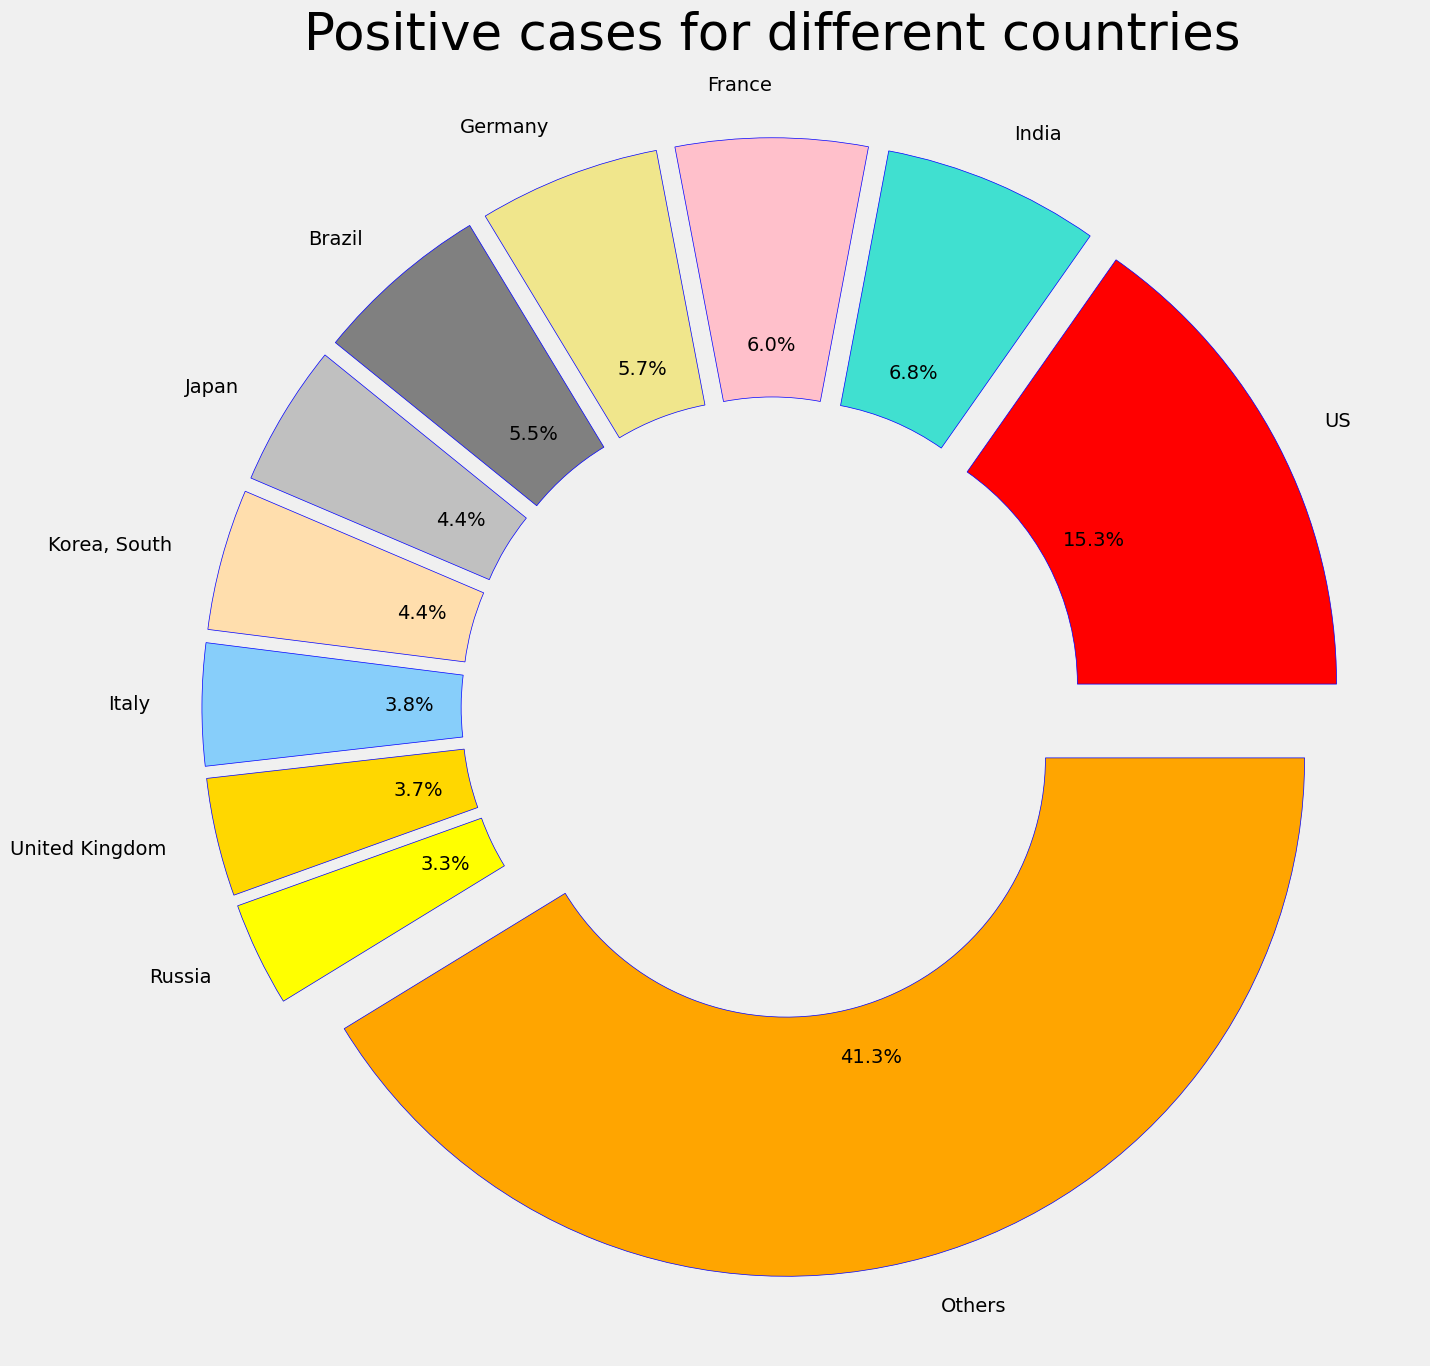

In [104]:
#positive cases for different countries
def pie_chart(a,b,title):
    plt.figure(figsize=(21,16))
    colours = ['red', 'turquoise', 'pink', 'khaki', 'grey', 'silver', 'navajowhite', 'lightskyblue', 'gold', 'yellow', 'orange']
    plt.title('Positive cases for different countries', size=37)
    plt.pie(b, colors=colours, autopct='%.1f%%', labels=visual_unique_countries, wedgeprops={'width': 0.5, 'edgecolor': 'b'}, explode = [0.1 for _ in range(len(visual_confirmed_cases))])
    plt.show()
    
pie_chart(visual_unique_countries, visual_confirmed_cases, 'Confirmed cases for different countries')

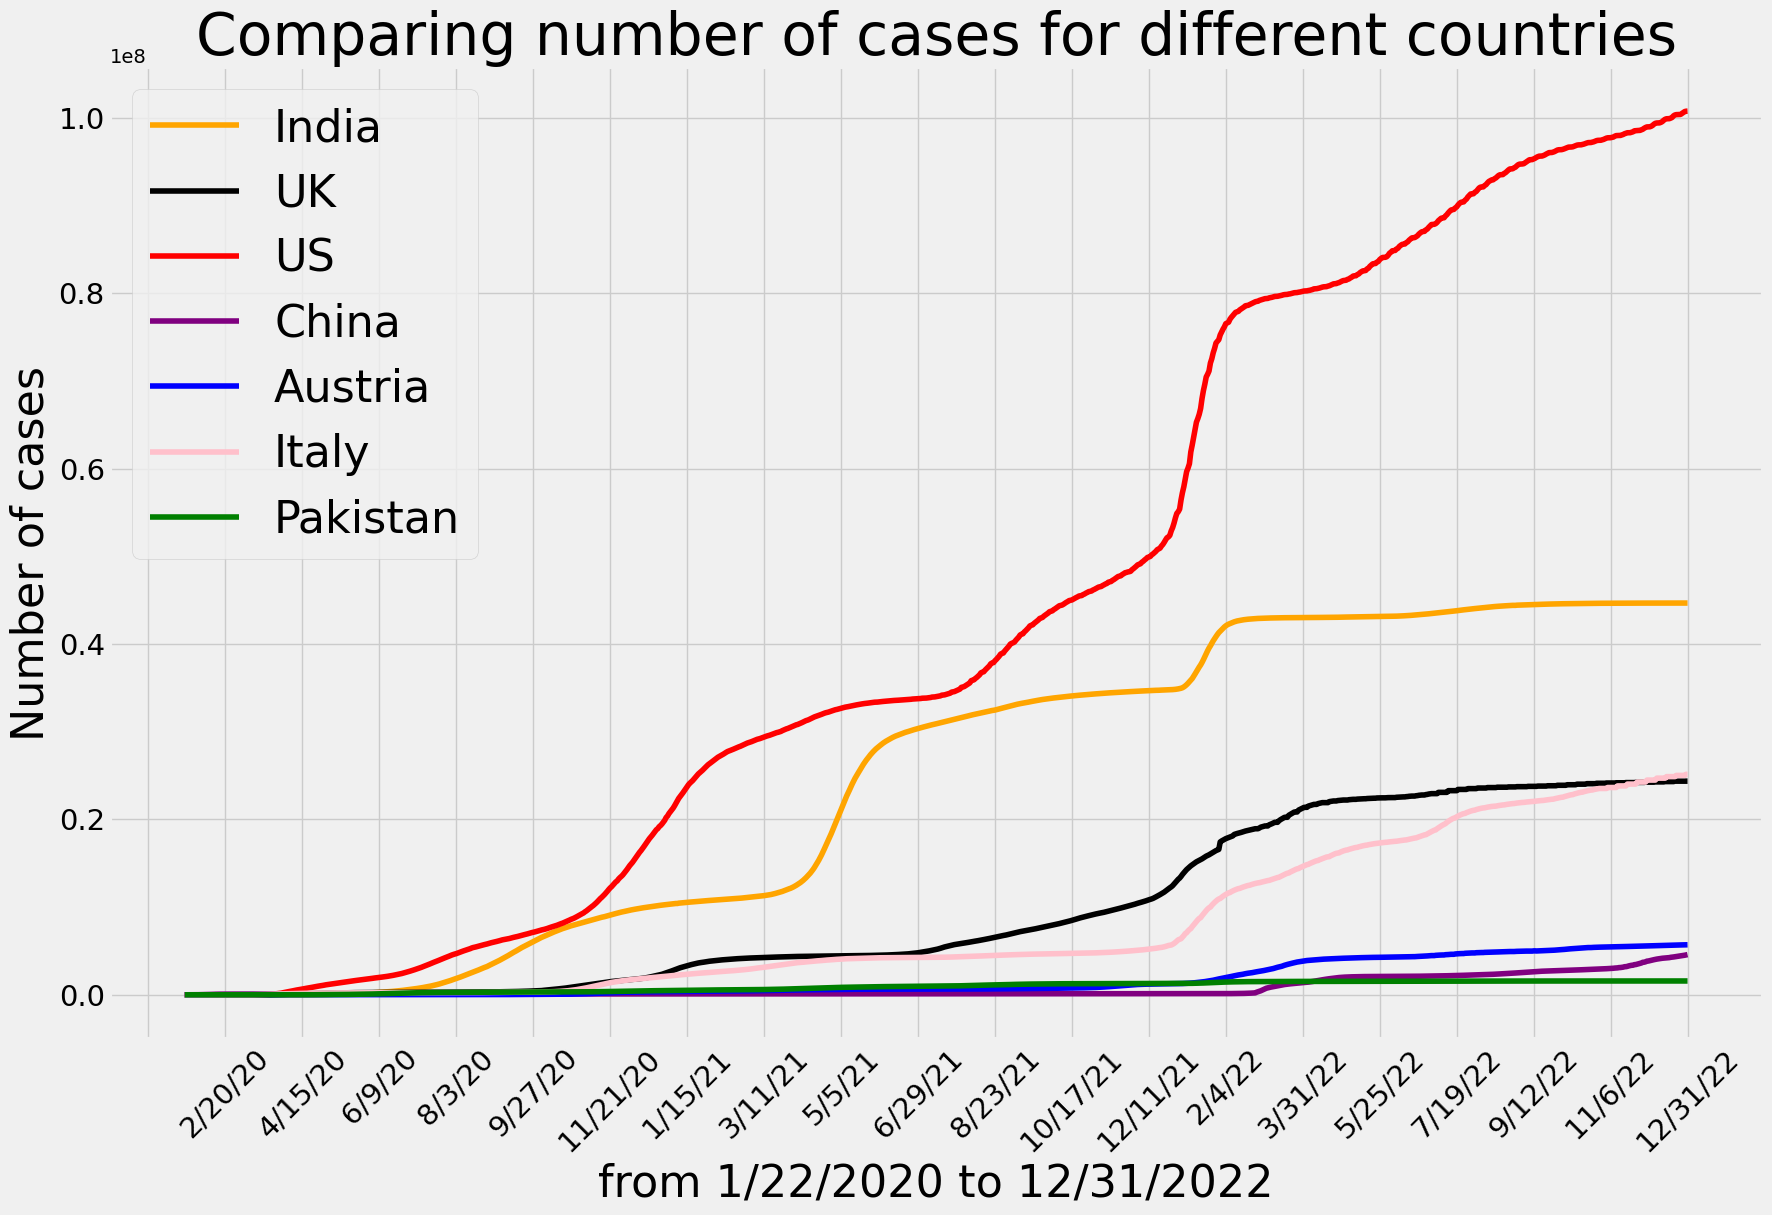

In [51]:
#Comparing number of cases for different countires
plt.figure(figsize=(19,12))
plt.plot(dates, india_cases, color='orange')
plt.plot(dates, uk_cases, color='black')
plt.plot(dates, us_cases, color='red')
plt.plot(dates, china_cases, color='purple')
plt.plot(dates, austria_cases, color='blue')
plt.plot(dates, italy_cases, color='pink')
plt.plot(dates, pakistan_cases, color='green')
plt.ylabel('Number of cases', size=32)
plt.yticks(size=21)
plt.xlabel('from 1/22/2020 to 12/31/2022', size=32)
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=55))
plt.xticks(size=21, rotation=45)
plt.legend(['India', 'UK', 'US', 'China', 'Austria', 'Italy', 'Pakistan'], prop={'size':32})
plt.title('Comparing number of cases for different countries', size=42)
plt.show()

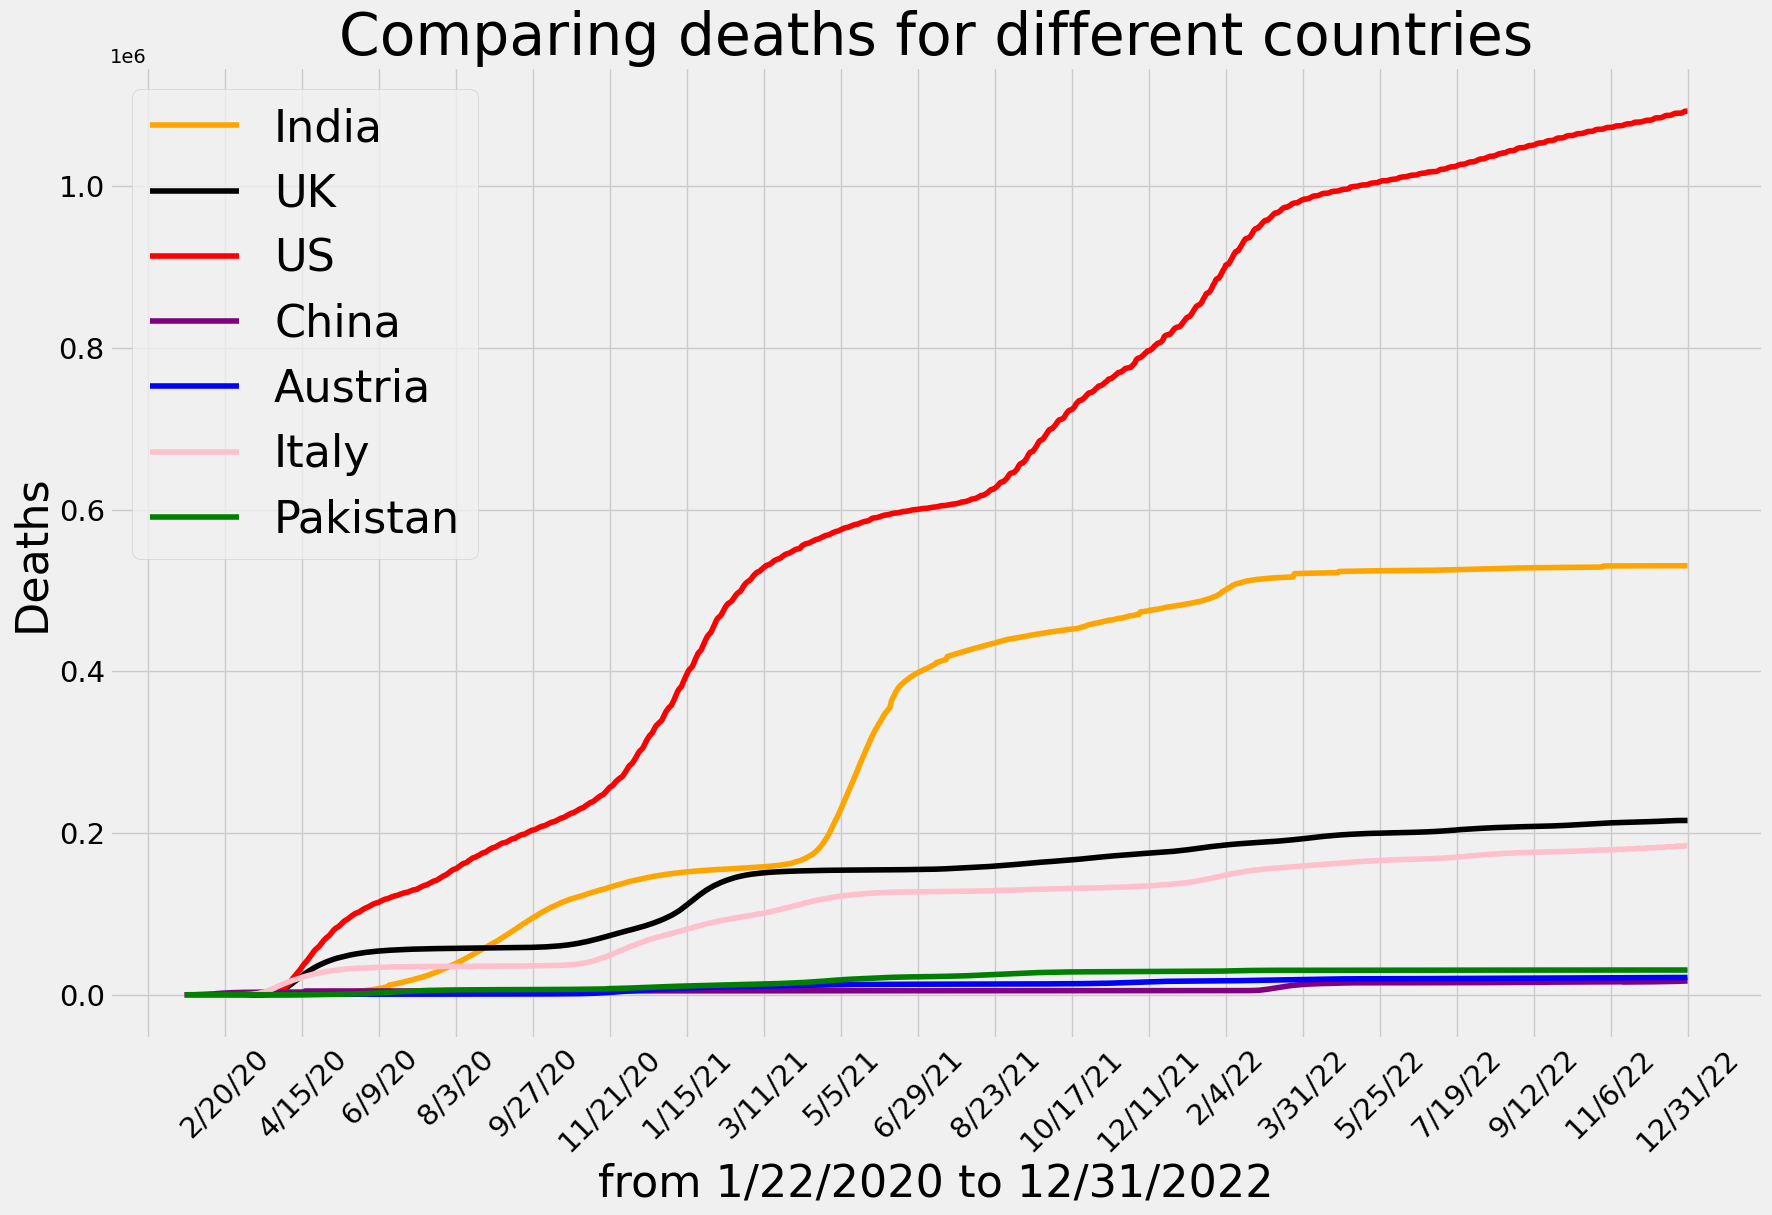

In [52]:
#Comparing deaths for different countires
plt.figure(figsize=(19,12))
plt.plot(dates, india_deaths, color='orange')
plt.plot(dates, uk_deaths, color='black')
plt.plot(dates, us_deaths, color='red')
plt.plot(dates, china_deaths, color='purple')
plt.plot(dates, austria_deaths, color='blue')
plt.plot(dates, italy_deaths, color='pink')
plt.plot(dates, pakistan_deaths, color='green')
plt.ylabel('Deaths', size=32)
plt.yticks(size=21)
plt.xlabel('from 1/22/2020 to 12/31/2022', size=32)
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=55))
plt.xticks(size=21, rotation=45)
plt.legend(['India', 'UK', 'US', 'China', 'Austria', 'Italy', 'Pakistan'], prop={'size':32})
plt.title('Comparing deaths for different countries', size=42)
plt.show()

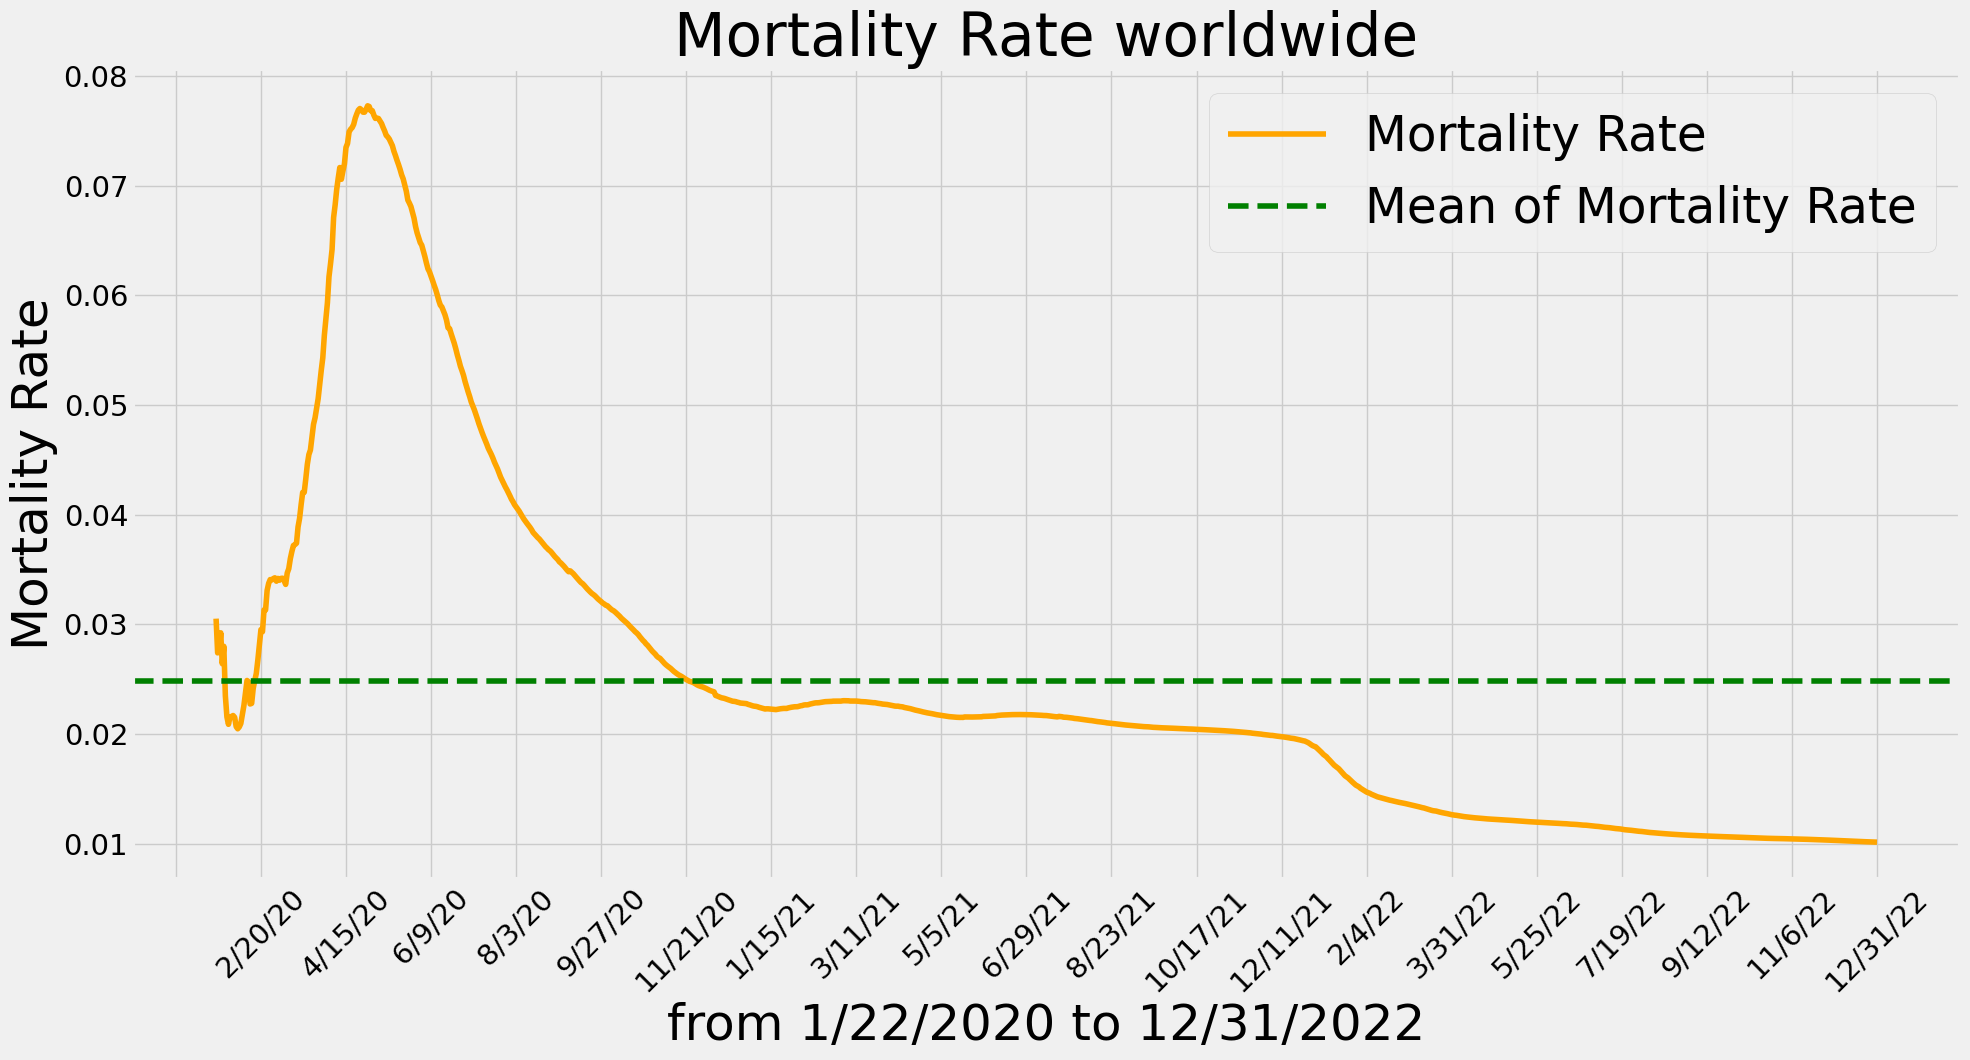

In [53]:
#Mortality rate worldwide
mortality_rate_mean = np.mean(mortality_rate)
plt.figure(figsize=(21,10))
plt.plot(dates, mortality_rate, color='orange')
plt.axhline(mortality_rate_mean, color='green', linestyle='dashed')
plt.ylabel('Mortality Rate', size=36)
plt.xlabel('from 1/22/2020 to 12/31/2022', size=36)
plt.yticks(size=21)
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=55))
plt.xticks(size=21, rotation=45)
plt.title('Mortality Rate worldwide', size=43)
plt.legend(['Mortality Rate', 'Mean of Mortality Rate'], prop={'size':35})
plt.show()

In [55]:
#Since regression models cannot pick a pattern, we're slightly modifying the data to fit the model better
#Using the data from 7/10/2022 till 12/31/2022 for prediction model
days_to_skip = 900

In [56]:
#Converting our data in an array
x = np.array([x for x in range(len(dates))]).reshape(-1,1)
y = np.array(world_cases).reshape(-1,1)

# Splitting the data into train and test

In [57]:
#Splitting the data into train and test
x_train, x_test, y_train, y_test = train_test_split(x[days_to_skip:], y[days_to_skip:], test_size=0.2, shuffle=False)

# Polynomial Regression

In [58]:
#Data transformation for polynomial regression
pol = PolynomialFeatures(degree=3)
x_train_pol = pol.fit_transform(x_train)
x_test_pol = pol.fit_transform(x_test)
pol_future_forecast = pol.fit_transform(forecast_future)

In [59]:
#Building polynomial regression model using linear regression function
model = LinearRegression()
model.fit(x_train_pol, y_train)
linear_pred_test = model.predict(x_test_pol)
linear_predictions = model.predict(pol_future_forecast)

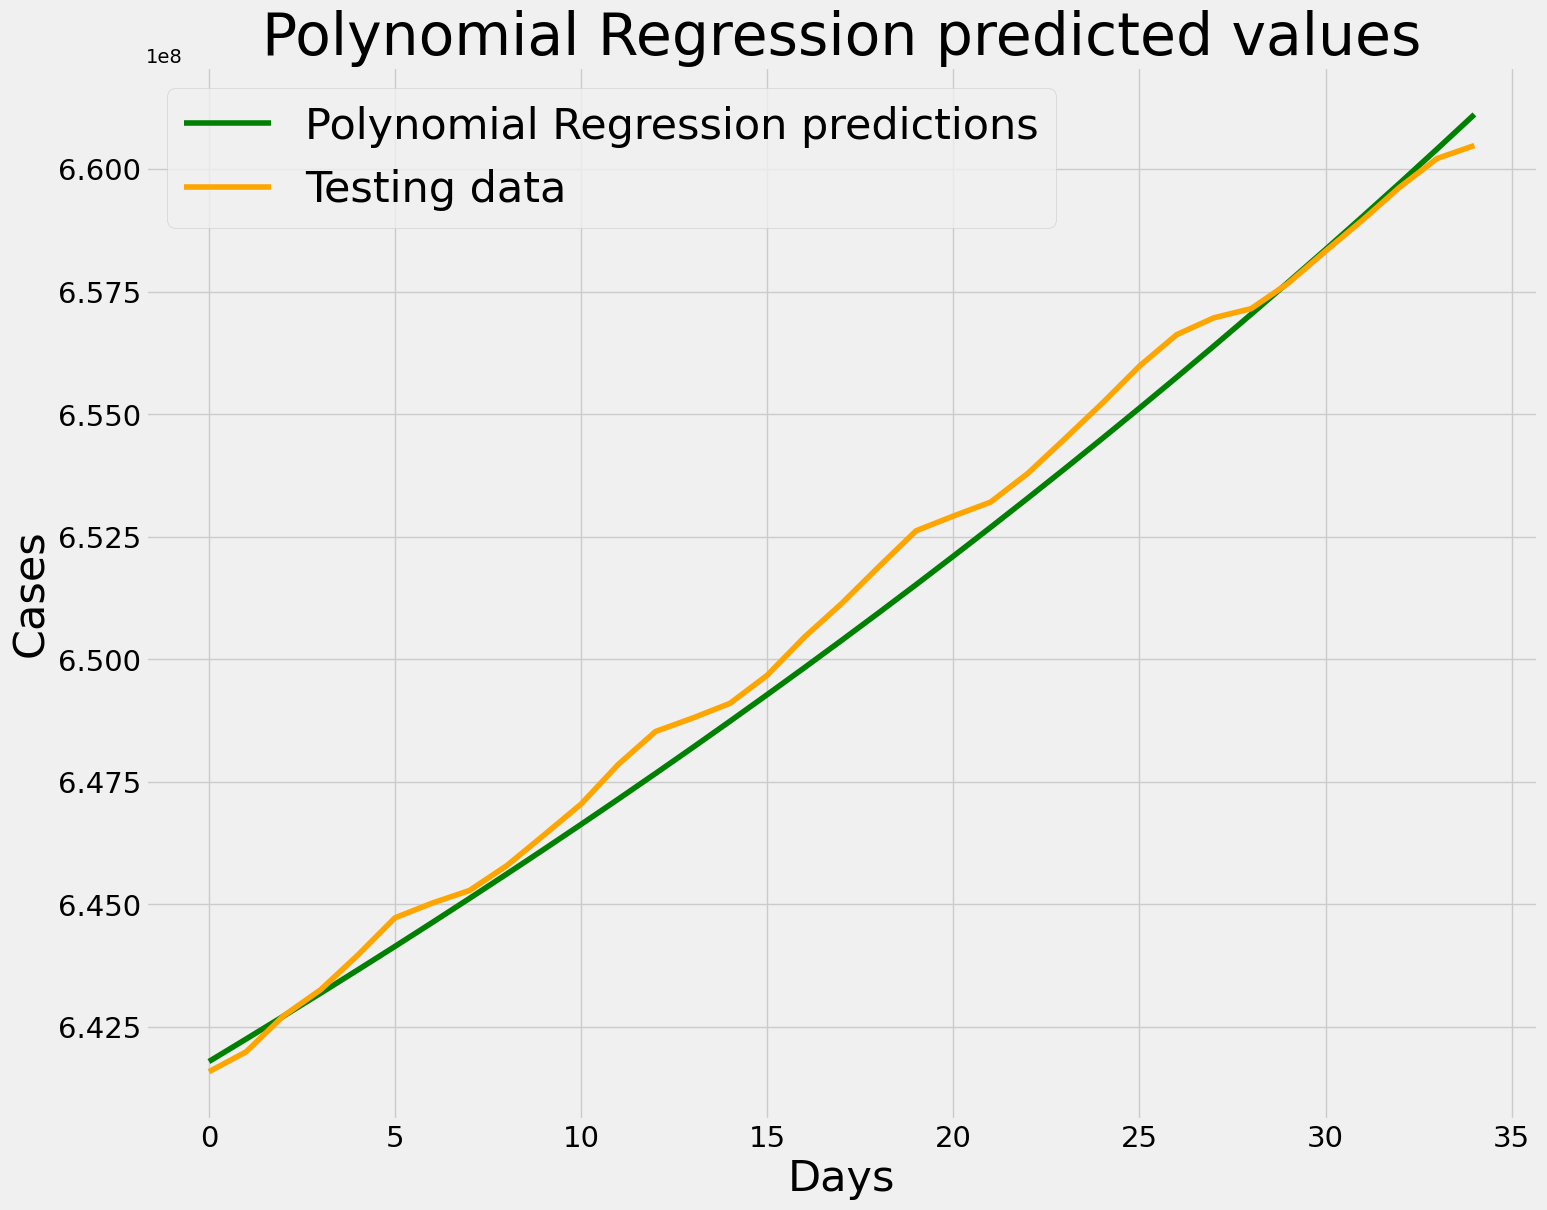

In [60]:
#Plotting the graph between the test data and predicted values from Polynormial Regression model
plt.figure(figsize=(16,13))
plt.plot(linear_pred_test, color='green')
plt.plot(y_test, color='orange')
plt.xticks(size=21)
plt.yticks(size=21)
plt.title('Polynomial Regression predicted values', size=42)
plt.legend(['Polynomial Regression predictions','Testing data'], prop={'size':31})
plt.ylabel('Cases', size=31)
plt.xlabel('Days', size=31)
plt.show()

In [61]:
print(model.coef_)

[[ 0.00000000e+00  7.79654773e+07 -7.69241494e+04  2.54234517e+01]]


In [62]:
#Checking the MAE and MSE for Polynomial Regression model
print('Mean Absolute Error:', mean_absolute_error(linear_pred_test, y_test))
print('Mean Squared Error:', mean_squared_error(linear_pred_test, y_test))

Mean Absolute Error: 451832.86442587717
Mean Squared Error: 294329520918.9113


# Bayesian Ridge Regression

In [64]:
bayesian_pol = PolynomialFeatures(degree=3)
x_train_bay = bayesian_pol.fit_transform(x_train)
x_test_bay = bayesian_pol.fit_transform(x_test)
bay_future_forecast = bayesian_pol.fit_transform(forecast_future)

In [65]:
tol = [1e-6, 1e-5, 1e-4, 1e-3, 1e-2]
alpha_1 = [1e-7, 1e-6, 1e-5, 1e-4, 1e-3]
alpha_2 = [1e-7, 1e-6, 1e-5, 1e-4, 1e-3]
lambda_1 = [1e-7, 1e-6, 1e-5, 1e-4, 1e-3]
lambda_2 = [1e-7, 1e-6, 1e-5, 1e-4, 1e-3]

bay_grid = {'tol': tol, 'alpha_1': alpha_1, 'alpha_2' : alpha_2, 'lambda_1': lambda_1, 'lambda_2' : lambda_2}

baye = BayesianRidge()
baye_search = RandomizedSearchCV(baye, bay_grid)
baye_search.fit(x_train_bay, y_train)

C:\Users\g\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\g\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\g\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\g\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning

RandomizedSearchCV(estimator=BayesianRidge(),
                   param_distributions={'alpha_1': [1e-07, 1e-06, 1e-05, 0.0001,
                                                    0.001],
                                        'alpha_2': [1e-07, 1e-06, 1e-05, 0.0001,
                                                    0.001],
                                        'lambda_1': [1e-07, 1e-06, 1e-05,
                                                     0.0001, 0.001],
                                        'lambda_2': [1e-07, 1e-06, 1e-05,
                                                     0.0001, 0.001],
                                        'tol': [1e-06, 1e-05, 0.0001, 0.001,
                                                0.01]})

In [66]:
baye_search.best_params_

{'tol': 0.0001,
 'lambda_2': 1e-05,
 'lambda_1': 0.001,
 'alpha_2': 1e-05,
 'alpha_1': 0.0001}

In [67]:
baye_confirmed = baye_search.best_estimator_
baye_pred_test = baye_confirmed.predict(x_test_bay)
baye_pred = baye_confirmed.predict(bay_future_forecast)

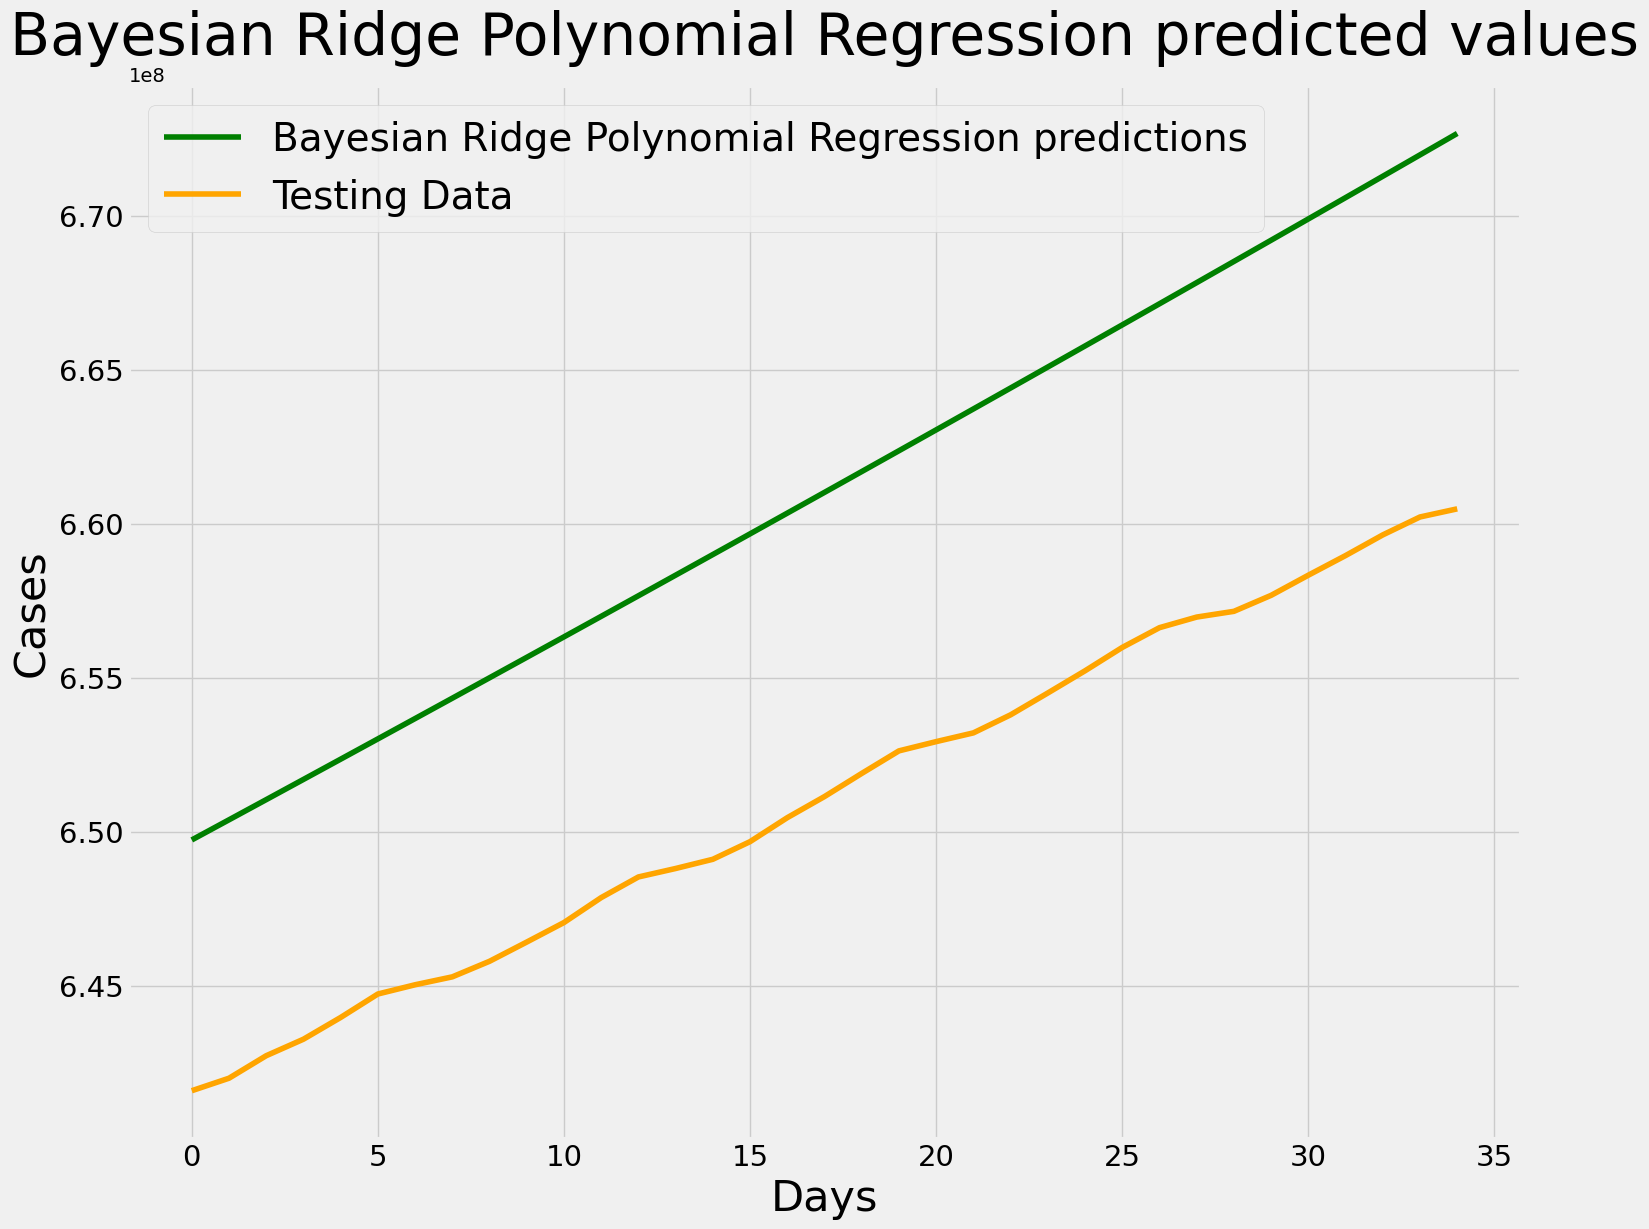

In [68]:
#Plotting the graph between the test data and predicted values from Bayesian Ridge model
plt.figure(figsize=(16,13))
plt.plot(baye_pred_test, color='green')
plt.plot(y_test, color='orange')
plt.yticks(size=21)
plt.xticks(size=21)
plt.legend(['Bayesian Ridge Regression predictions', 'Testing Data'], prop={'size':28})
plt.title('Bayesian Ridge Polynomial Regression predicted values', size=42)
plt.ylabel('Cases', size=31)
plt.xlabel('Days', size=31)
plt.show()

In [69]:
#Checking the MAE and MSE for Bayesian Ridge Polynomial Regression model
print('Mean Absolute Error:', mean_absolute_error(baye_pred_test, y_test))
print('Mean Squared Error:', mean_squared_error(baye_pred_test, y_test))

Mean Absolute Error: 9949144.572066076
Mean Squared Error: 100286372600178.38


# Support Vector Machines

In [71]:
# # Used this cell to find the optimal parameters for SVM
# c = [0.01, 0.1, 1]
# gamma = [0.01, 0.1, 1]
# epsilon = [0.01, 0.1, 1]
# shrinking = [True, False]

# svm_grid = {'C': c, 'gamma' : gamma, 'epsilon': epsilon, 'shrinking' : shrinking}

# svm = SVR(kernel='poly', degree=3)
# svm_search = RandomizedSearchCV(svm, svm_grid, scoring='neg_mean_squared_error', cv=3, return_train_score=True, n_jobs=-1, n_iter=30, verbose=1)
# svm_search.fit(X_train_confirmed, y_train_confirmed)

In [72]:
# svm_search.best_params_
#svm = svm_search.best_estimator_

In [73]:
#Building Support Vector Machines model
svm = SVR(kernel = 'poly')
svm.fit(x_train, y_train)
svm_predictions = svm.predict(forecast_future)
svm_test_predictions = svm.predict(x_test)

C:\Users\g\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


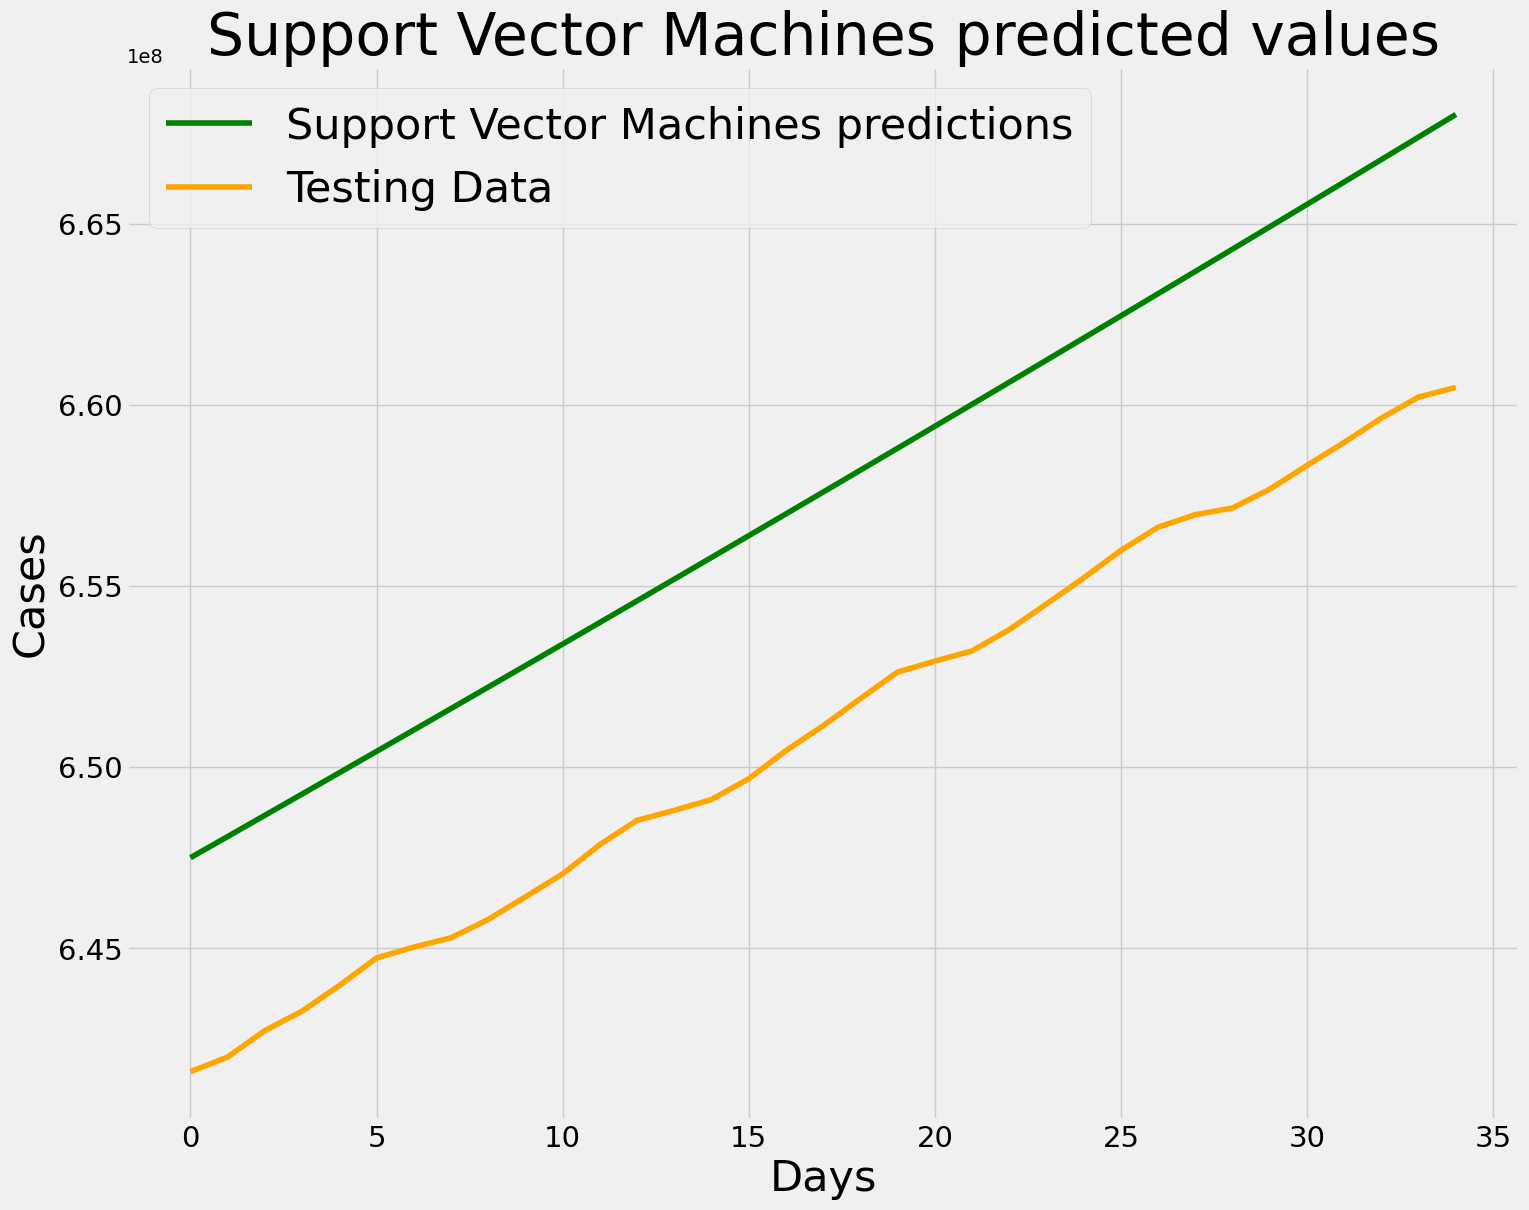

In [74]:
#Plotting the graph between the test data and predicted values from Support Vector Machines model
plt.figure(figsize=(16,13))
plt.plot(svm_test_predictions, color='green')
plt.plot(y_test, color='orange')
plt.yticks(size=21)
plt.xticks(size=21)
plt.legend(['Support Vector Machines predictions', 'Testing Data'], prop={'size':31})
plt.title('Support Vector Machines predicted values', size=42)
plt.ylabel('Cases', size=31)
plt.xlabel('Days', size=31)
plt.show()

In [75]:
#Checking the MAE and MSE for Support Vector Machines model
print('Mean Absolute Error', mean_absolute_error(svm_test_predictions, y_test))
print('Mean Squared Error', mean_squared_error(svm_test_predictions, y_test))

Mean Absolute Error 6519254.72971799
Mean Squared Error 42706579393991.33


# Comparing prediction graphs for different model

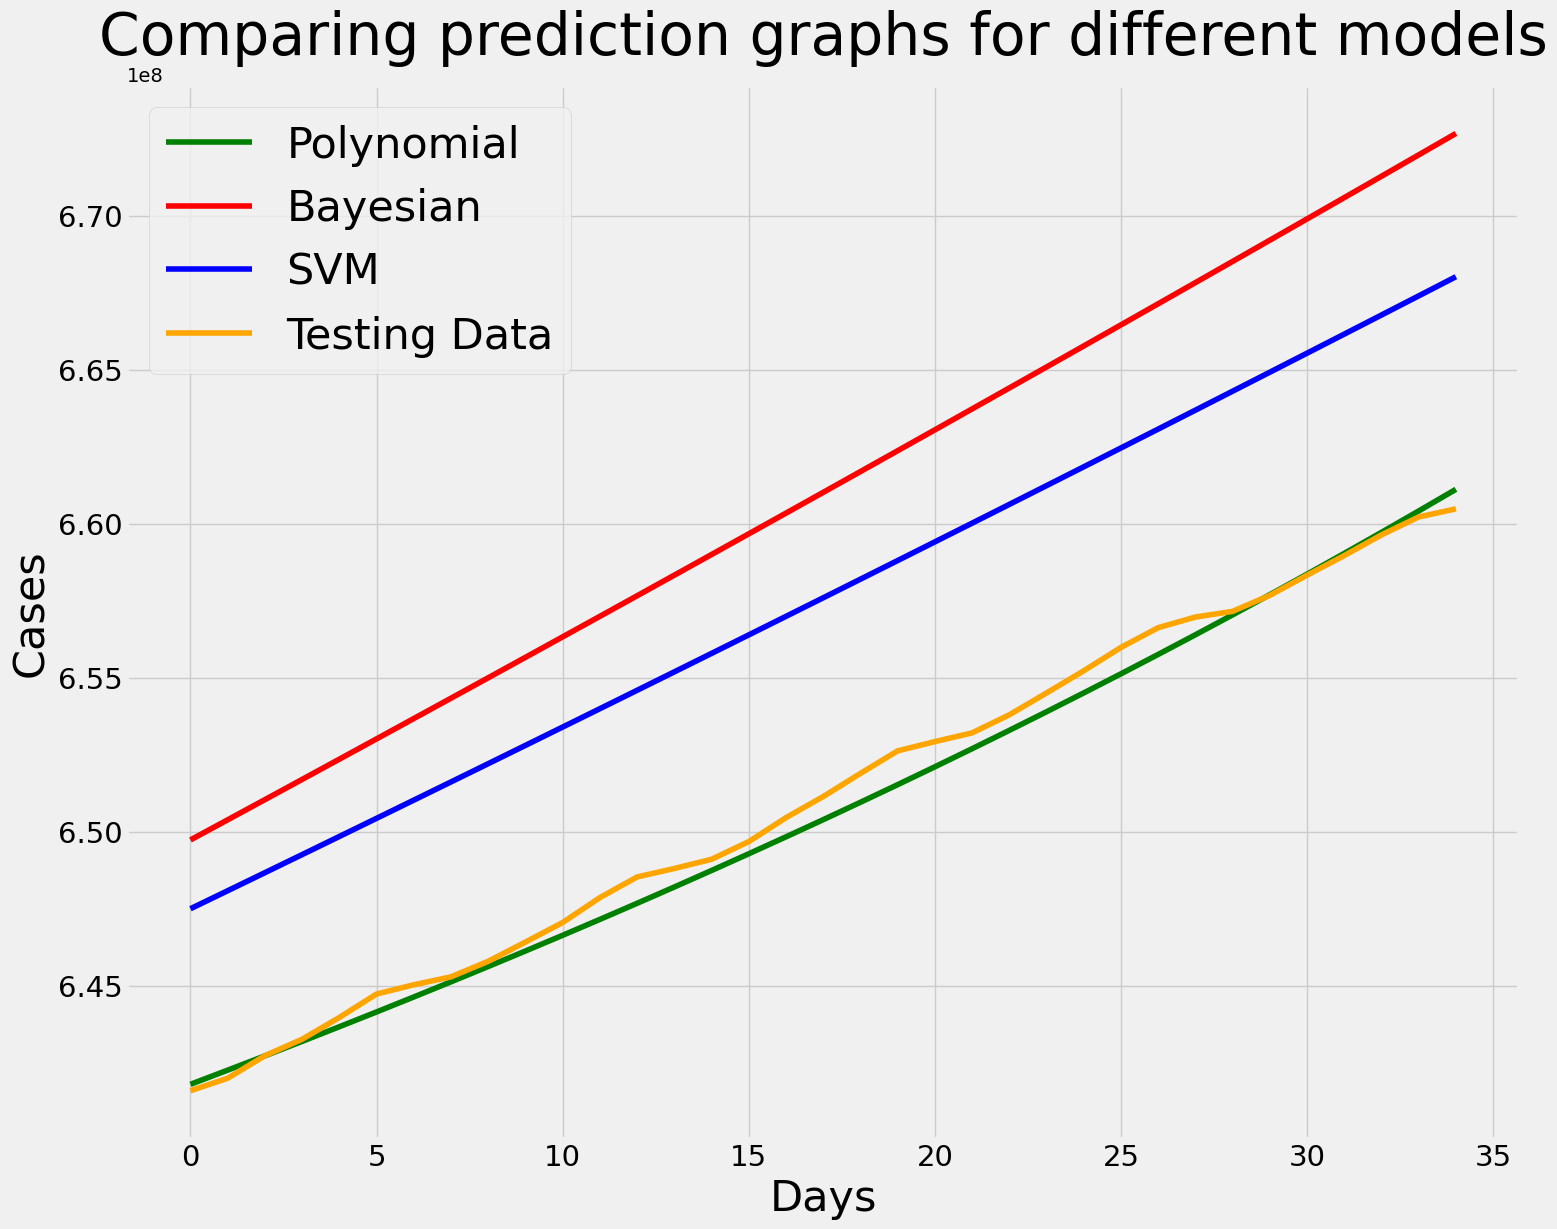

In [119]:
#comparing prediction graphs for different model
plt.figure(figsize=(16,13))
plt.plot(linear_pred_test, color='green')
plt.plot(baye_pred_test, color='red')
plt.plot(svm_test_predictions, color='blue')
plt.plot(y_test, color='orange')
plt.yticks(size=21)
plt.xticks(size=21)
plt.legend(['Polynomial', 'Bayesian', 'SVM', 'Testing Data'], prop={'size':31})
plt.title('Comparing prediction graphs for different models', size=42)
plt.ylabel('Cases', size=31)
plt.xlabel('Days', size=31)
plt.show()

# Predicting cases for next 20 days

In [63]:
#Predicting future cases using polynomial regression
linear_predictions = linear_predictions.reshape(1,-1)[0]
poly_df = pd.DataFrame({'Date': forecast_future_dates[-20:], 'Predicted confirmed cases worldwide using Polynomial Regression': np.round(linear_predictions[-20:])})
poly_df.style.background_gradient(cmap='Reds')

In [110]:
#Predicting future cases using Bayesian Ridge Polynomial Regression
bayesian_df = pd.DataFrame({'Date': forecast_future_dates[-20:], 'Predicted confirmed cases worldwide using Bayesian Ridge Regression': np.round(baye_pred[-20:])})
bayesian_df.style.background_gradient(cmap='Reds')

In [76]:
#Predicting future cases using svm
svm_df = pd.DataFrame({'Date': forecast_future_dates[-20:], 'Predicted confirmed cases worldwide using SVM': np.round(svm_predictions[-20:])})
svm_df.style.background_gradient(cmap='Reds')

# Comparing actual values with predicted values for next 20 days

In [112]:
#Extracting the actual values for the next 20 days
actual = con.iloc[: , 1079:1099]
actual_values = actual.sum()

In [115]:
#Comparing different model's predictions with the actual values
compare = pd.DataFrame({'Date': forecast_future_dates[-20:],  'Actual': actual_values, 'Polynomial': np.round(linear_predictions[-20:]), 'Bayesian Ridge': np.round(baye_pred[-20:]), 'SVM': np.round(svm_predictions[-20:])})
compare.style.background_gradient(cmap='Reds')